# CREDIT CARD FRAUD DETECTION, by Prateek Yadav

In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import sys
import pickle
import bisect

from scipy import stats
import sklearn

import collections


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix as cm
from scipy.stats import mstats
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
#pip install xgboost==0.7.post4
from sklearn.feature_selection import RFE

In [12]:
#if you dont have XGBOOST - TIP, how to install it in MAC : pip install xgboost==0.7.post4


juypter warnings control and settings change (if any)

In [4]:
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_rows',100)
pd.set_option('max_columns',50)

check versions of libraries that are imported and our SW version of python.. (any future ref)

In [13]:
print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
#print('Matplotlib : {}'.format(plt.__version__))
print('Seaborn : {}'.format(sns.__version__))

Python : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
Numpy : 1.18.1
Pandas : 1.0.1
Seaborn : 0.10.0


In [14]:
df= pd.read_csv("data/creditcard.csv")
df.shape

(284807, 31)

## Exploratory data analysis

In [158]:
#class 0 for normal transaction and class 1 for fraud transaction
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [163]:
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [159]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [175]:
df.info()
#checking NULL values
#df.isnull().any(axis=0) 
#df.isnull().any(axis=1) 
#everything is not null, so we should not delete and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [160]:
# CODE if we want to take the small set ofdata to try our code.. say 0.1 fraction or 10%, 
#data = df.sample(frac = 0.1, random_state=1)

In [162]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [171]:
#printing the share of Fraud and non fraud cases in the dataset for skewness check.
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Valid Cases :', normal_share , "%")
print('Fraud Cases :', fraud_share, "%")

Valid Cases : 99.82725143693798 %
Fraud Cases : 0.1727485630620034 %


In [172]:
#other methods to print the class imbalance in the dataset
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/ float(len(Valid))

print(outlier_fraction)

print('Fraud Cases : {}'.format(len(Fraud)))
print('Valid Cases : {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [174]:
print(len(df[df.Class == 1].index)/len(df.index)*100, "%" , ": Valid set")
print(len(df[df.Class == 0].index)/len(df.index)*100, "%", " : Fraud set")

0.1727485630620034 % : Valid set
99.82725143693798 %  : Fraud set


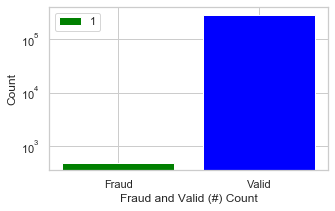

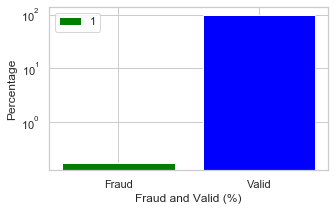

In [196]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
names = ['Fraud', 'Valid']
plt.figure(figsize = (5,3))
plt.bar(np.arange(2),[len(df[df.Class == 1].index),len(df[df.Class == 0].index)] , color = ['green', 'blue'])
#plt.plot(len(df[df.Class == 0].index), color = 'blue')
plt.xticks(np.arange(2), names)
plt.xlabel('Fraud and Valid (#) Count')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(['1'],loc = 'upper left')
plt.show()

plt.figure(figsize = (5,3))
plt.bar(np.arange(2),[100*(len(df[df.Class == 1].index)/len(df.index)),100*(len(df[df.Class == 0].index)/len(df.index))] , color = ['green', 'blue'])
#plt.plot(len(df[df.Class == 0].index), color = 'blue')
plt.xticks(np.arange(2), names)
plt.xlabel('Fraud and Valid (%)')
plt.ylabel('Percentage')
plt.yscale('log')
plt.legend(['1'],  loc = 'upper left')
plt.show()

<blockquote> <b> INTERIM RESULT - 1 </blockquote> 
    Class '1', entires just constituting 0.173% and from the above graphs, we can see that data is clearly imbalanced with less of fraud cases.
<b> this is called as data imbalance | data skewness  </b>

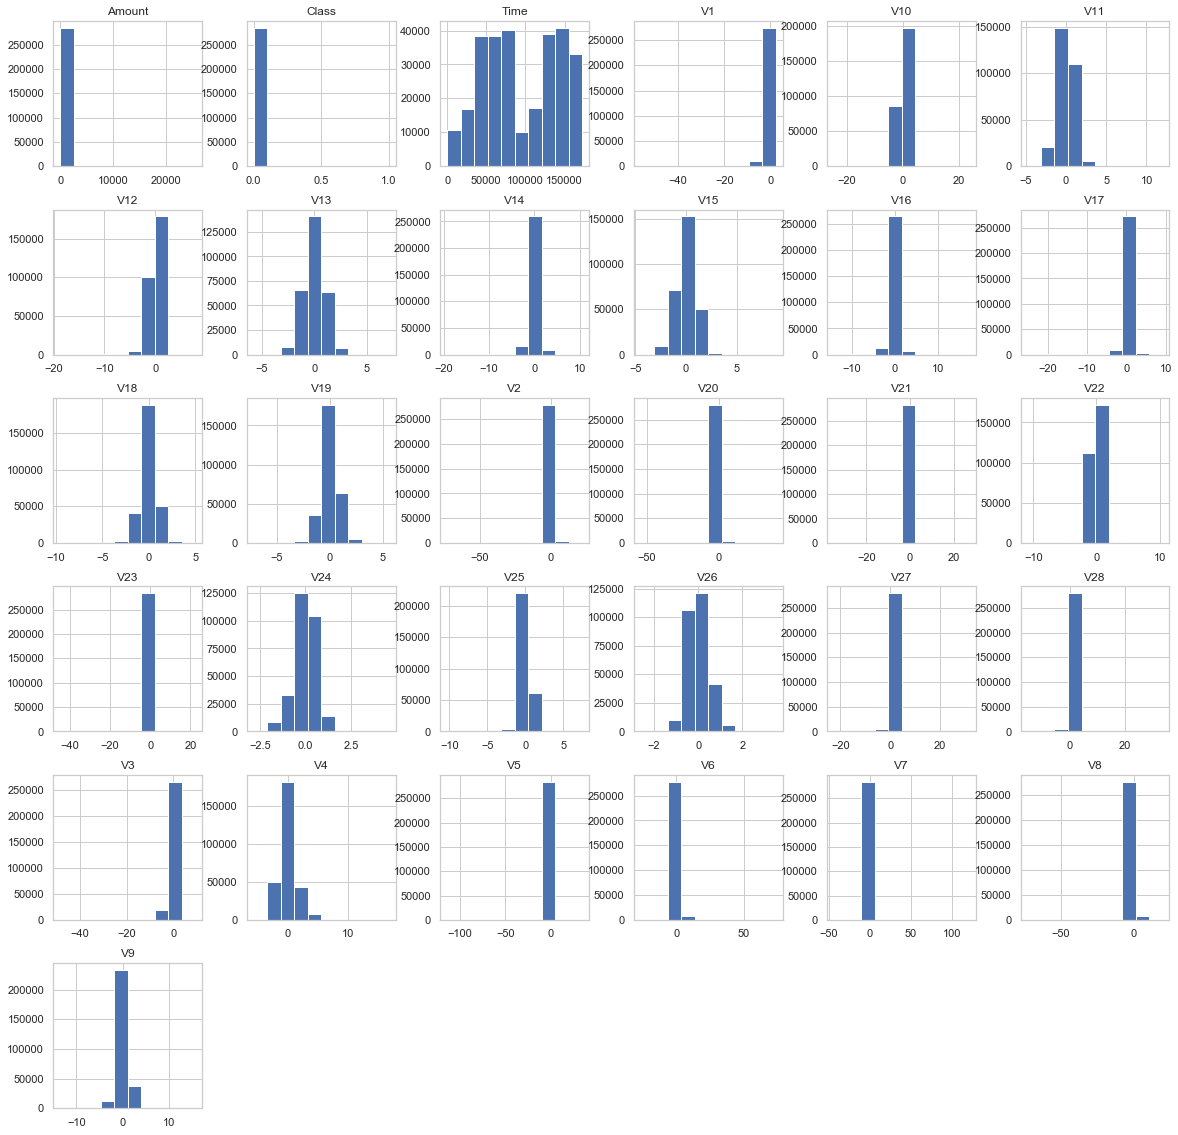

In [197]:
#plot histogram
df.hist(figsize = (20,20))
plt.show()

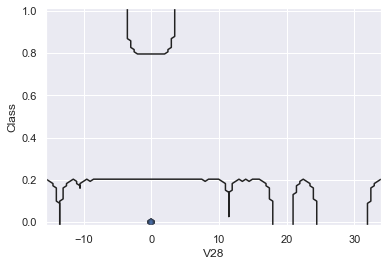

In [40]:
sns.kdeplot(df.V28, df.Class)

In [119]:
print(df.iloc[4517])

Time      3829.000000
V1          -0.788520
V2           0.458544
V3           2.965360
V4           0.646258
V5          -0.383436
V6           1.128470
V7          -0.464031
V8           0.486064
V9           1.719575
V10         -1.003989
V11          0.668377
V12         -2.449016
V13          0.842165
V14          0.999558
V15         -1.237904
V16          0.523307
V17         -0.000660
V18          1.683348
V19          0.268167
V20         -0.025953
V21          0.082600
V22          0.586078
V23         -0.435607
V24         -0.551666
V25          0.422840
V26         -0.159240
V27          0.091332
V28          0.066186
Amount      28.390000
Class        0.000000
Name: 4517, dtype: float64


In [198]:
fraud = df[df.Class == 1]
valid = df[df.Class == 0]

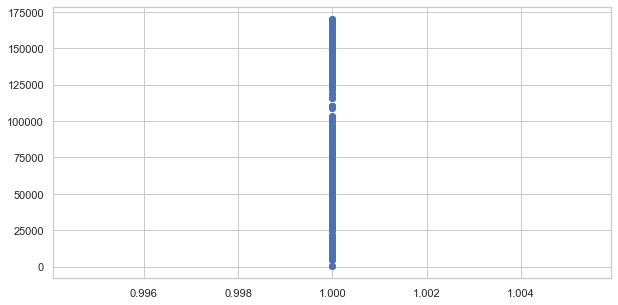

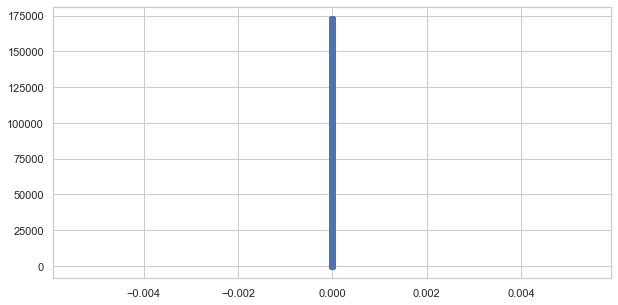

In [219]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize = (10,5))
plt.scatter(fraud.Class, fraud.Time)
plt.figure(figsize = (10,5))
plt.scatter(valid.Class, valid.Time)

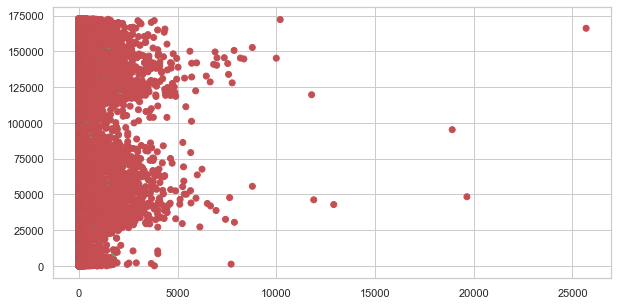

In [225]:
class_1 = df.Class
colormap_1 = np.array(['r', 'g'])
plt.figure(figsize = (10,5))
plt.scatter(df.Amount, df.Time, c = colormap_1[class_1])

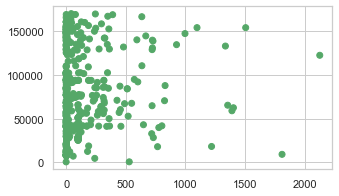

In [226]:
class_2 = fraud.Class
colormap_2 = np.array(['r', 'g'])
plt.figure(figsize = (5,3))
plt.scatter(fraud.Amount, fraud.Time, c = colormap_2[class_2])

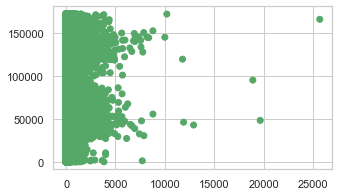

In [227]:
class_3 = valid.Class
colormap_3 = np.array(['g', 'r'])
plt.figure(figsize = (5,3))
plt.scatter(valid.Amount, valid.Time, c = colormap_3[class_3])

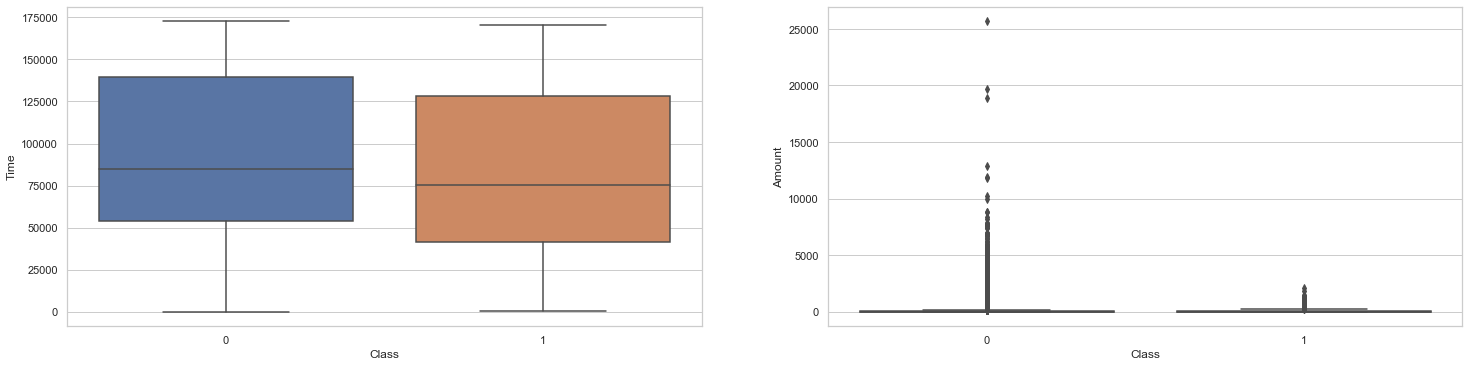

In [228]:
#Visualizing via Box plots
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
sns.boxplot( x = "Class", y = 'Time', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Class', y = 'Amount', data = df)

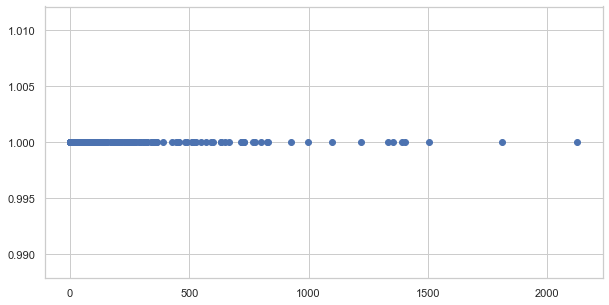

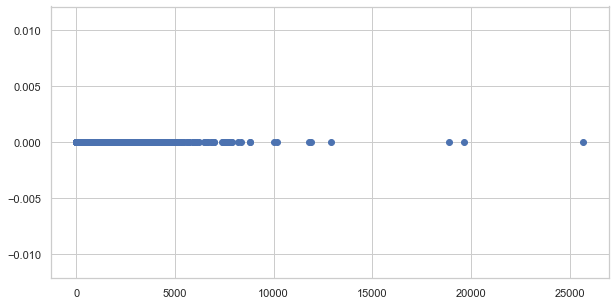

In [230]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize = (10,5))
plt.scatter(fraud.Amount, fraud.Class)
plt.figure(figsize = (10,5))
plt.scatter(valid.Amount , valid.Class )

<blockquote> <b> INTERIM RESULT - 2 </blockquote> 
    Distribution of classes with respect to Amount shows a variation. In fraud trasactions, ther max amount was not crossing 2000 units. The amount value is quite low for the Fraud transactions. We will keep the mount column for analysis as it has got a relation with Fraud Or not fraud.
    On the other hand, "time column" doesnt seems to have any relation with the Class of the cases - Fraud / Non fraud. Teh data is equally distributed for both the class in Time coumn.

In [15]:
df = df.drop('Time', axis = 1)

Checking if the data is Gaussian in Nature Or not ? #logoically it hsould be because the data is PCA transfomred

In [234]:
#column name 
col = []
for i in df.columns:
    if i != 'Time' and i!= 'Amount' and i != 'Class':
        col.append(i)

In [235]:
col

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

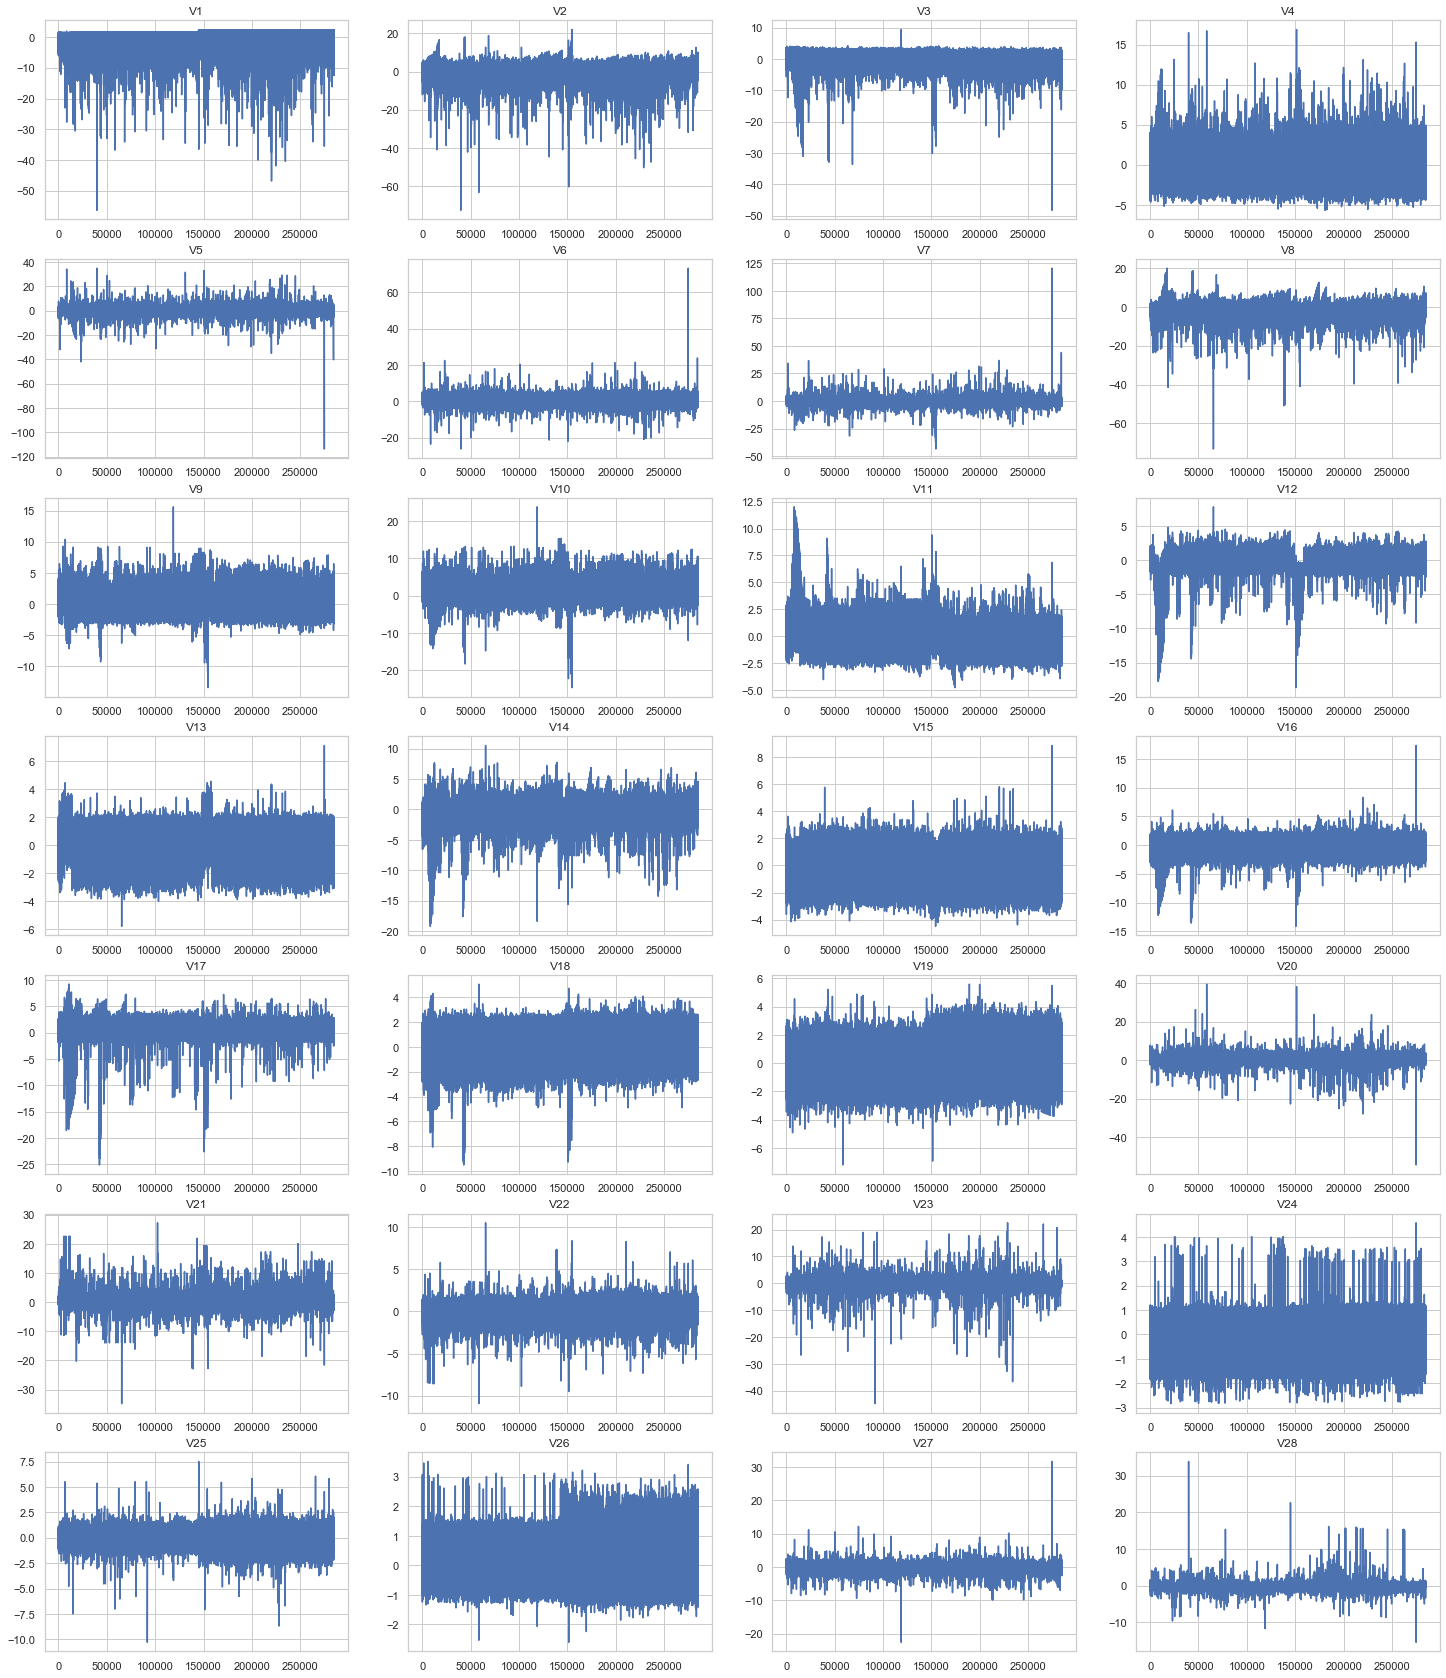

In [236]:
plt.figure(figsize=(25, 30))
n = 1
for i in col:
    plt.subplot(7,4,n, autoscale_on = True, title = i)
    #plt.title(i)
    plt.plot(df[i])
    n= n+1

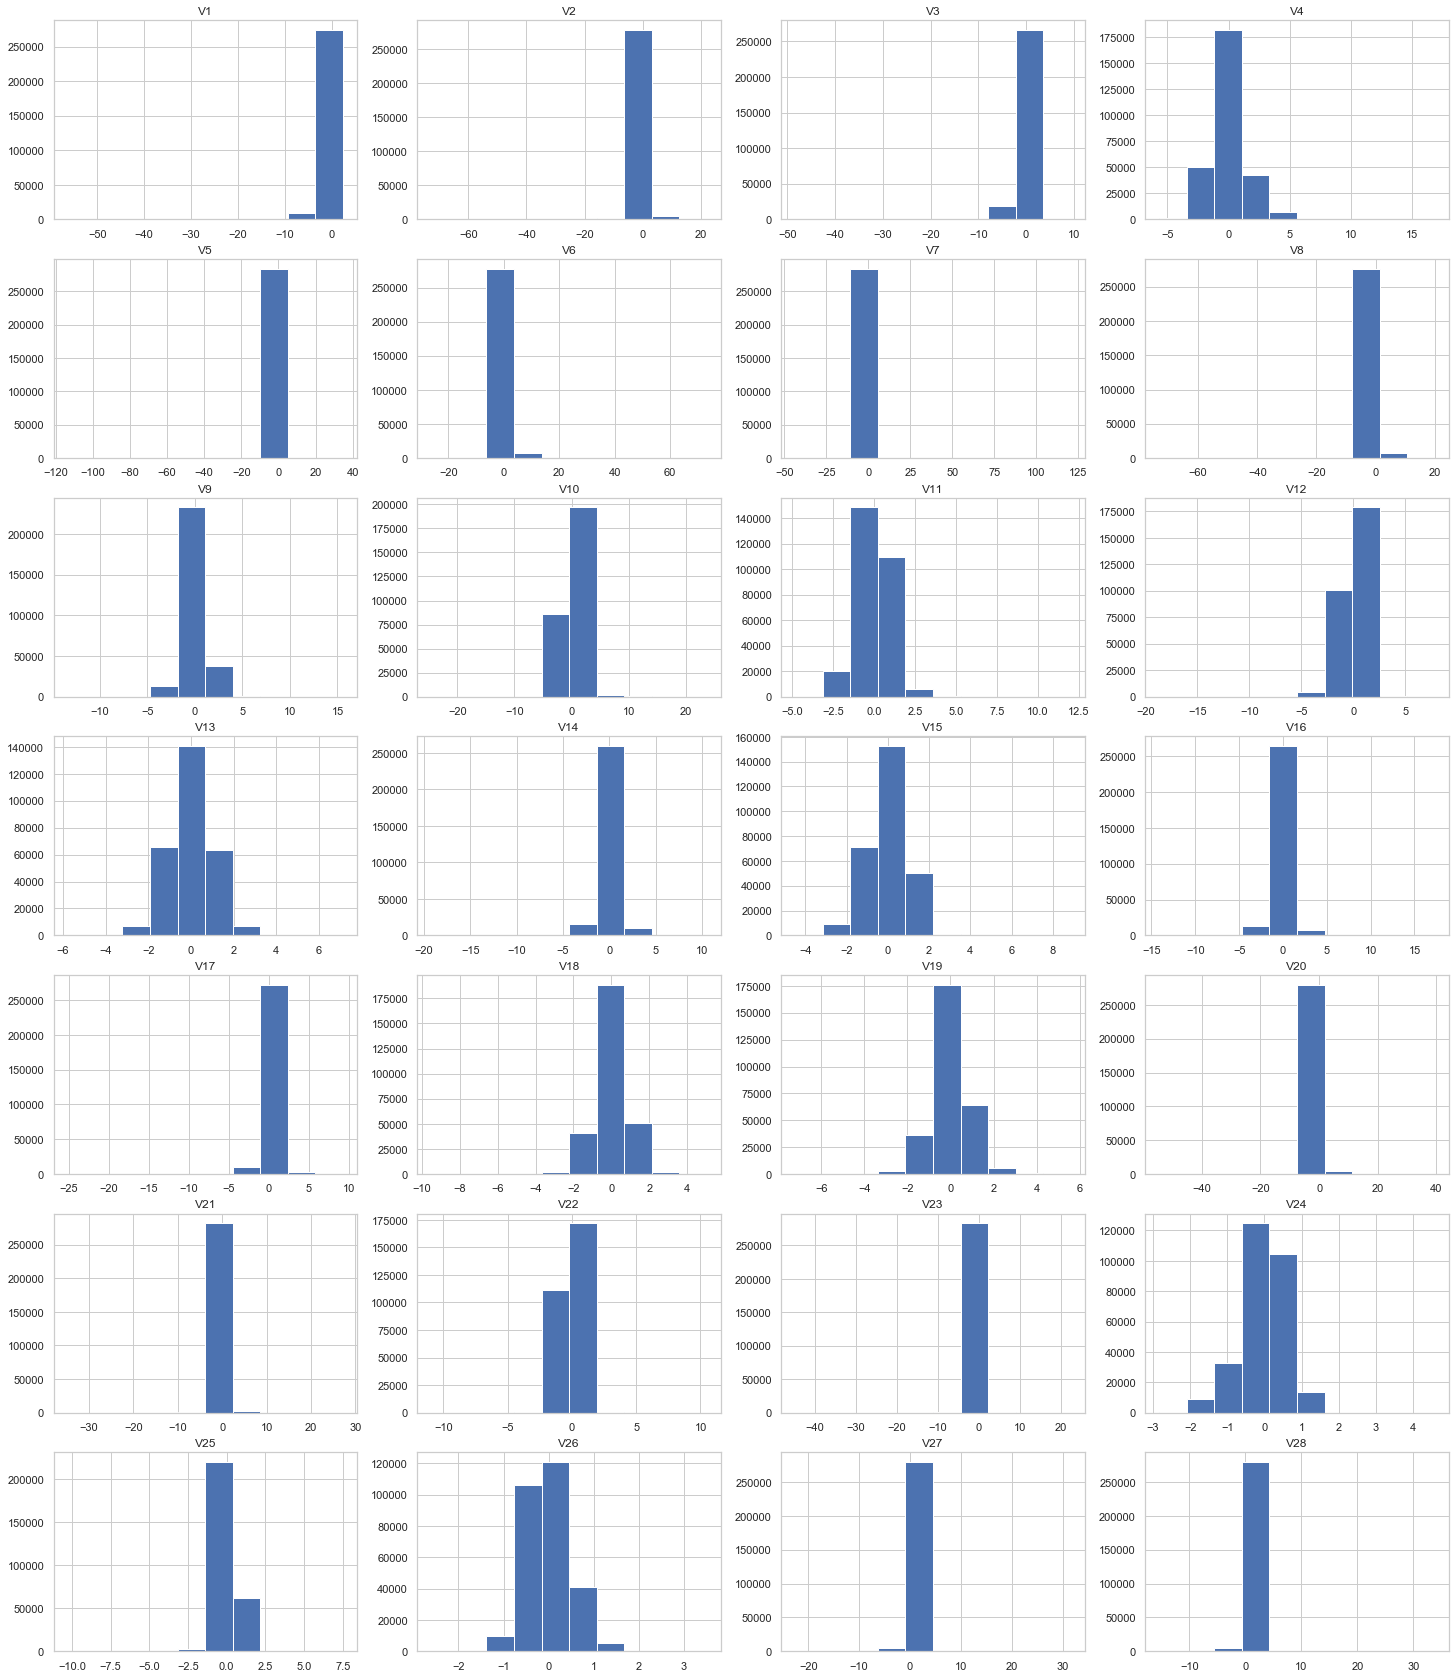

In [237]:
plt.figure(figsize=(25, 30))
n = 1
for i in col:
    plt.subplot(7,4,n, autoscale_on = True, title = i)
    #plt.title(i)
    plt.hist(df[i], align = 'mid')
    n= n+1

<blockquote> <b> INTERIM RESULT - 3 </blockquote> 
    After analysing both the graphs - histogram and random distgribution we can see that the features are gaussian in nature. This proves the PCA transformed data is Gaussian > using CLT (central limit theorem). 

In [239]:
# Checking the correlations in the columns
#dividing all the columents (28) into three parts.. 9 - 9 - 9 columns
col1 = []
col2 = []
col3 = []
for i in col:
    if int(i[1:]) <= 9:
        col1.append(i)
    elif int(i[1:]) <= 18:
        col2.append(i)
    else:
        col3.append(i)

In [240]:
col1.append('Class')
col2.append('Class')
col3.append('Class')

<Figure size 1800x2160 with 0 Axes>

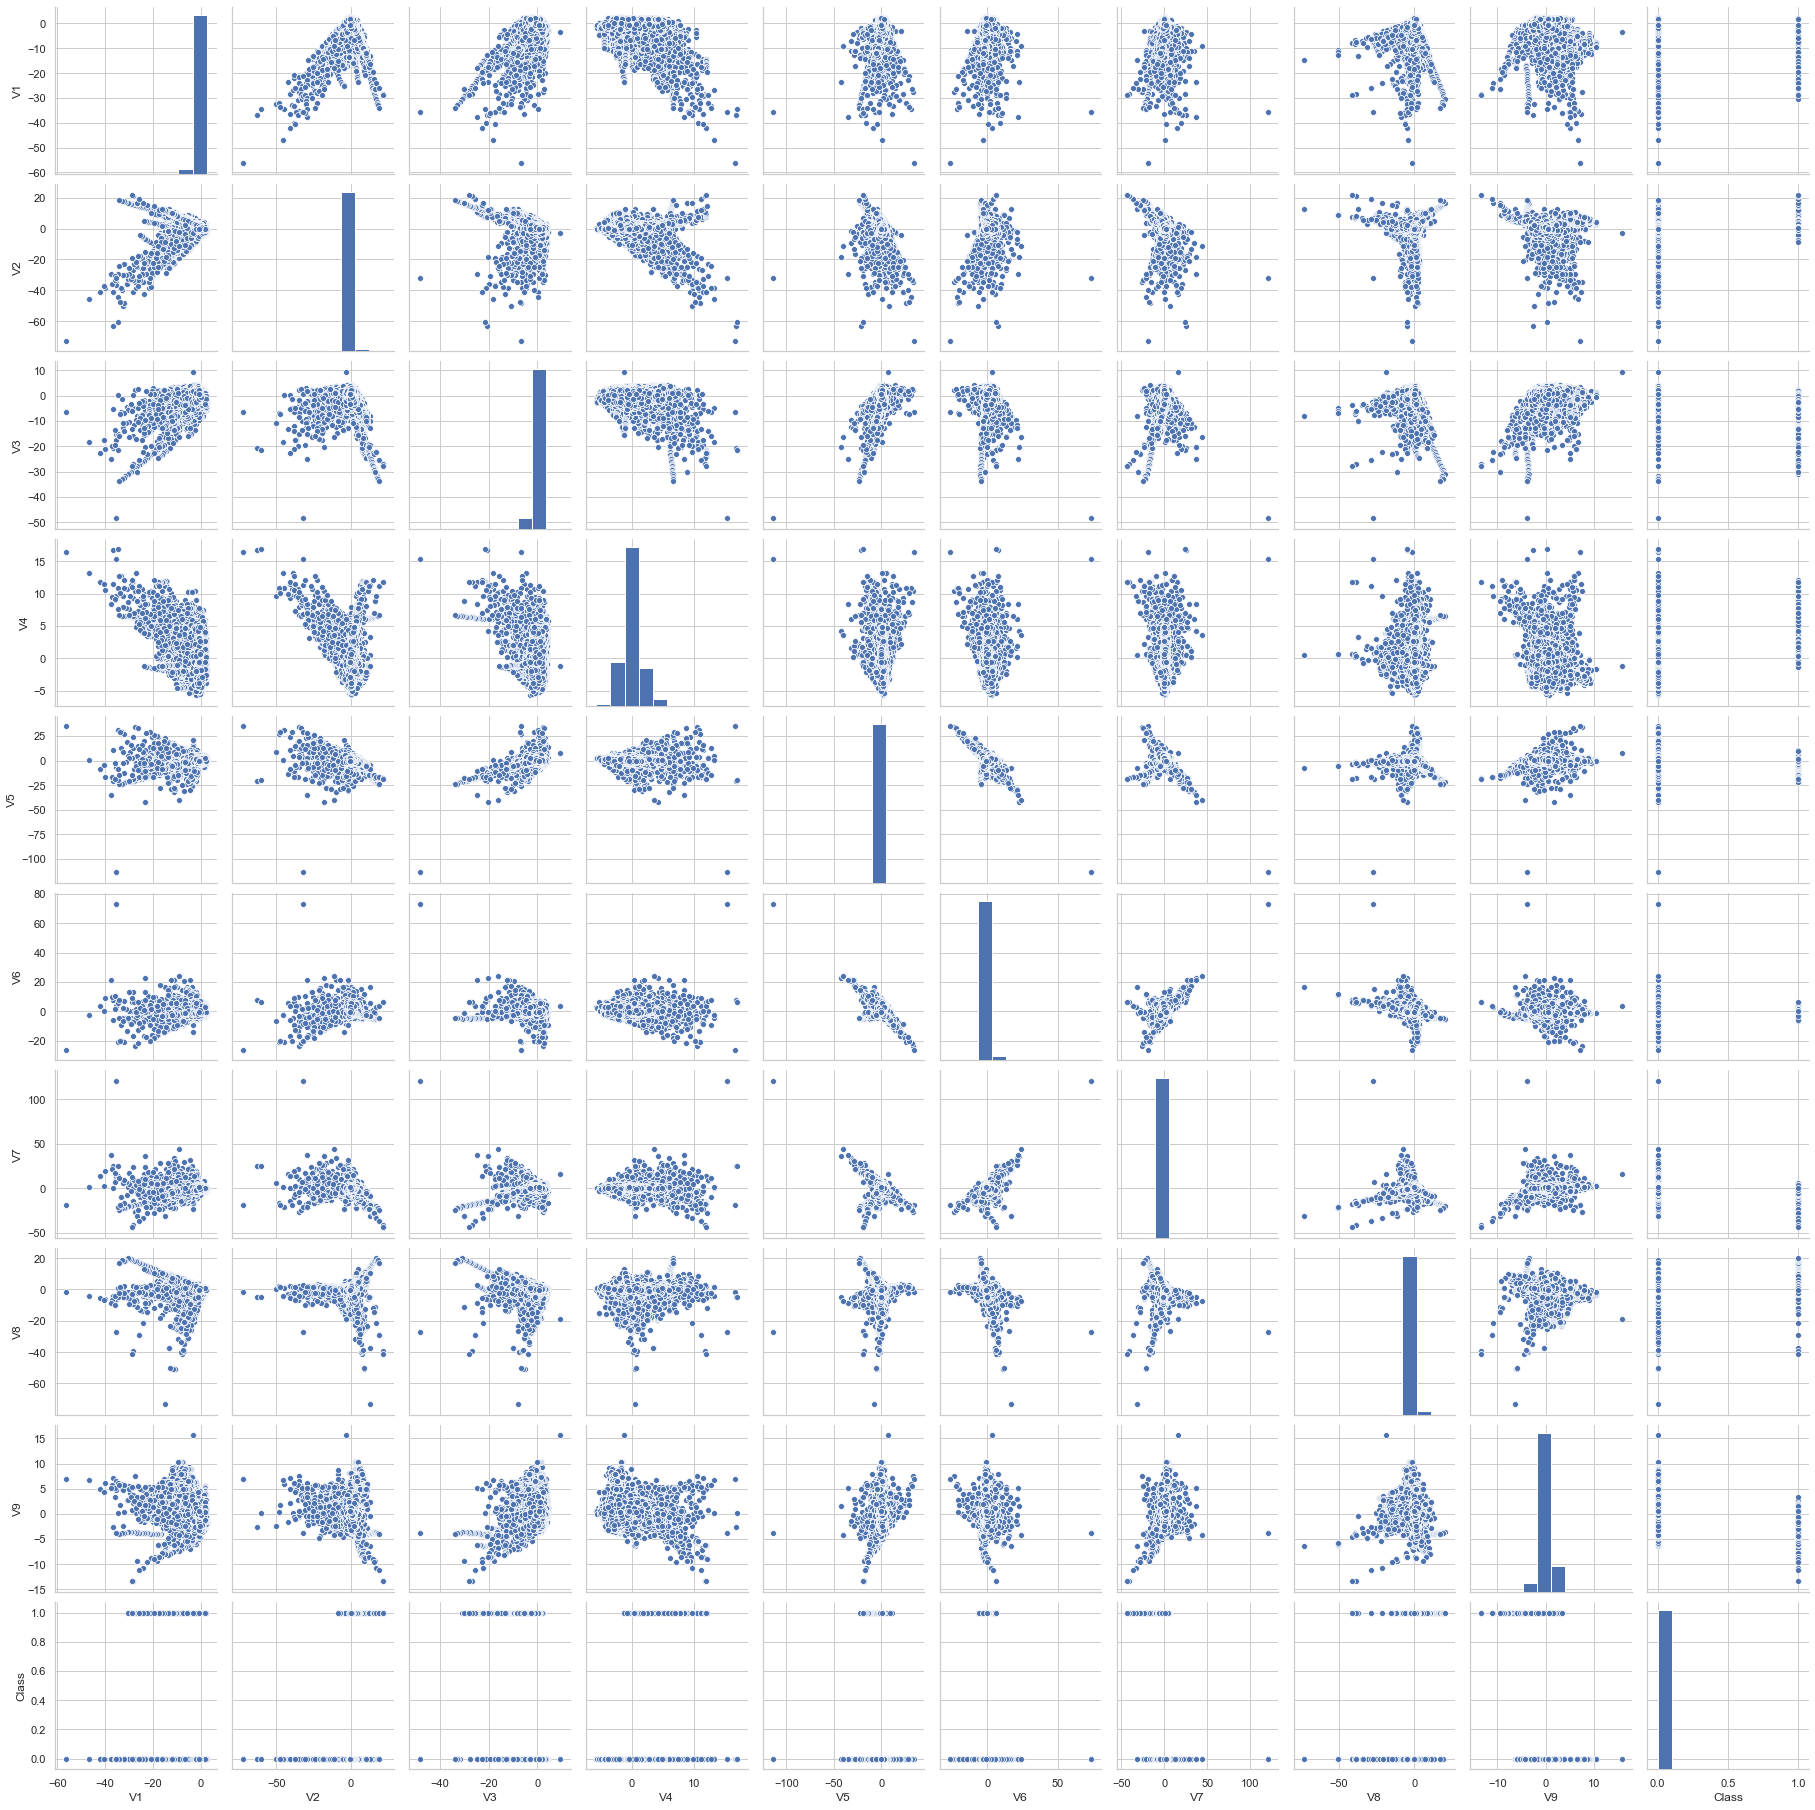

In [241]:
plt.figure(figsize = [25,30])
sns.pairplot(df[col1])
plt.show()

<Figure size 1800x2160 with 0 Axes>

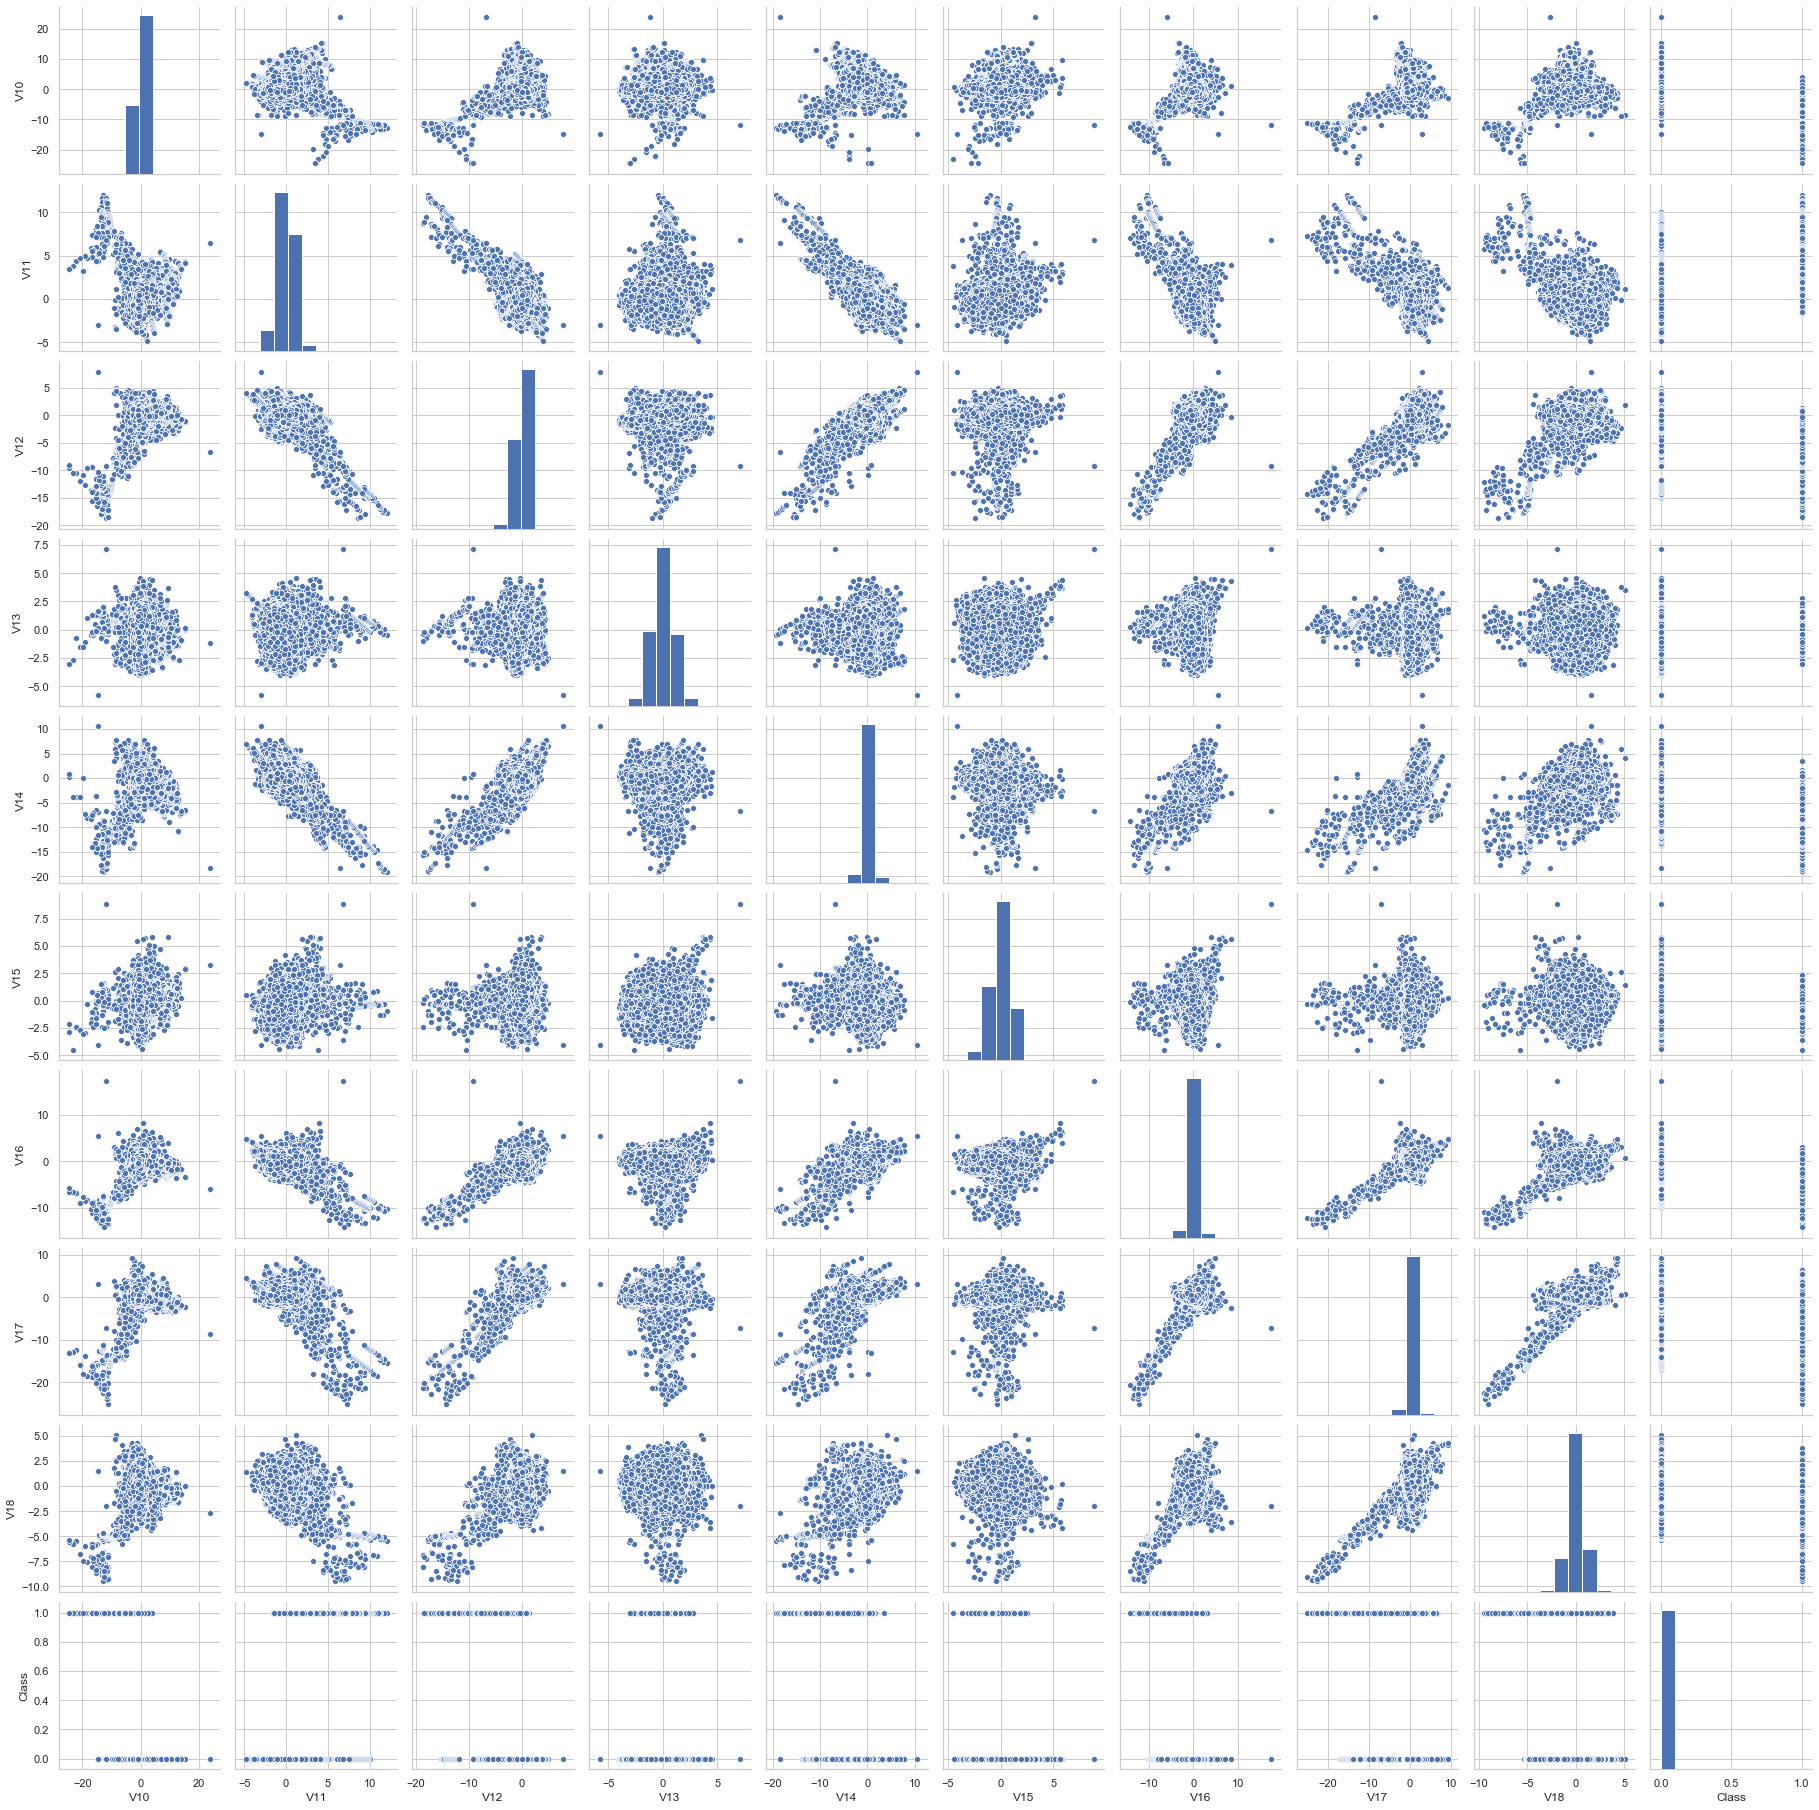

In [242]:
plt.figure(figsize = [25,30])
sns.pairplot(df[col2])
plt.show()

<Figure size 1800x2160 with 0 Axes>

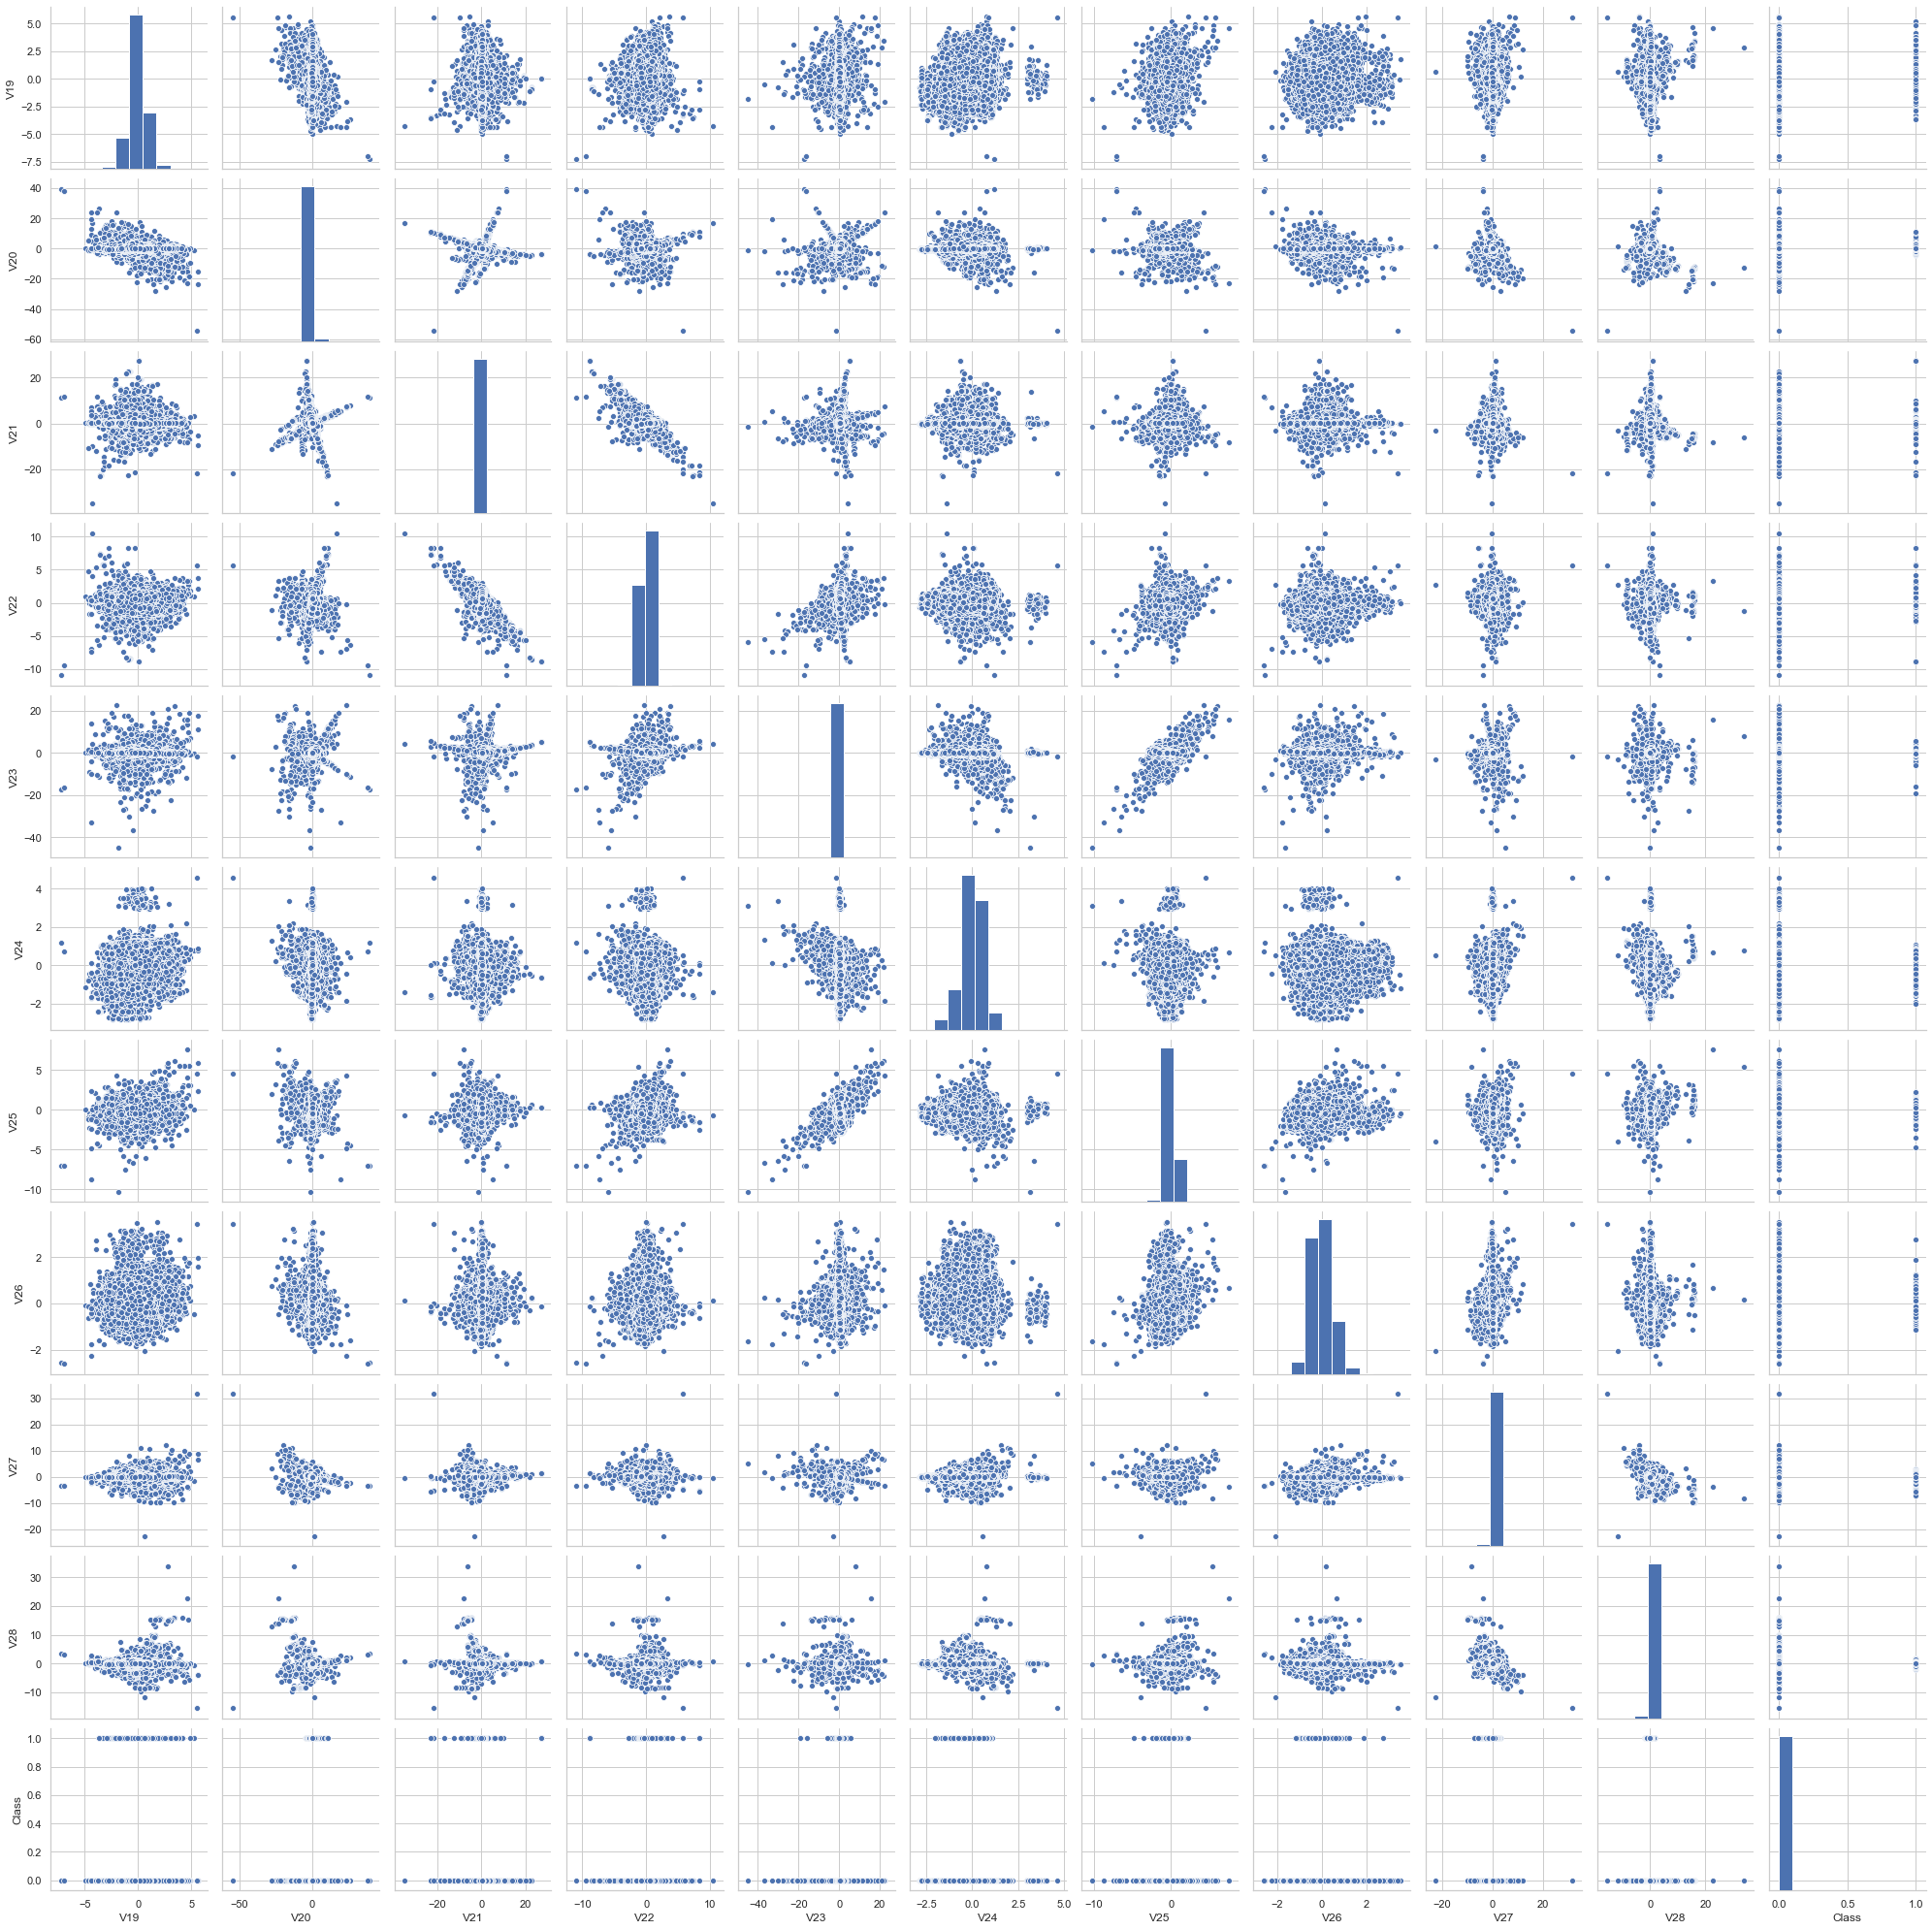

In [243]:
plt.figure(figsize = [25,30])
sns.pairplot(df[col3])
plt.show()

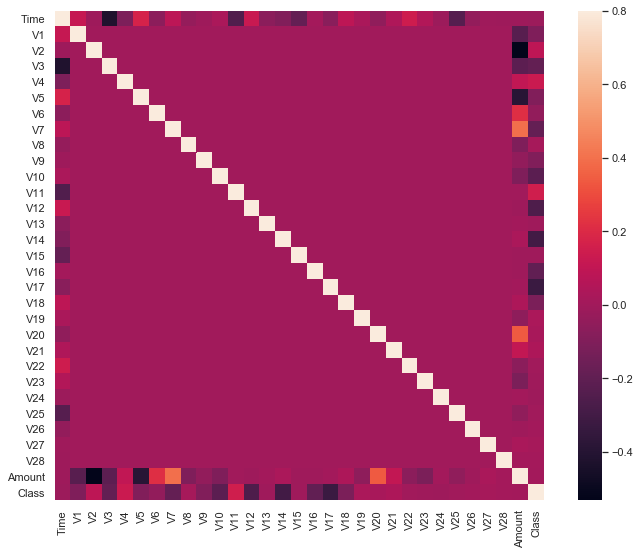

In [146]:
#correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [245]:
df[col1].corr('spearman')

V1        V2        V3        V4        V5        V6        V7  \
V1     1.000000 -0.384328 -0.412095  0.101011 -0.106632 -0.086561 -0.227650   
V2    -0.384328  1.000000  0.073967  0.155042  0.342701 -0.110393  0.426320   
V3    -0.412095  0.073967  1.000000  0.060812 -0.223849  0.171263 -0.074582   
V4     0.101011  0.155042  0.060812  1.000000  0.021367  0.075185  0.059920   
V5    -0.106632  0.342701 -0.223849  0.021367  1.000000 -0.007577  0.431573   
V6    -0.086561 -0.110393  0.171263  0.075185 -0.007577  1.000000 -0.292680   
V7    -0.227650  0.426320 -0.074582  0.059920  0.431573 -0.292680  1.000000   
V8    -0.236140  0.006980  0.164374 -0.009608 -0.057022  0.444053 -0.389213   
V9     0.138614 -0.077880 -0.030876  0.105248 -0.056580  0.028864 -0.100252   
Class -0.042424  0.051062 -0.059278  0.063045 -0.030147 -0.038410 -0.048308   

             V8        V9     Class  
V1    -0.236140  0.138614 -0.042424  
V2     0.006980 -0.077880  0.051062  
V3     0.164374 -0.030876 -0.059278  
V4    -0.009608  0.105248  0.063045  
V5    -0.057022 -0.056580 -0.030147  
V6     0.444053  0.028864 -0.038410  
V7    -0.389213 -0.100252 -0.048308  
V8     1.000000 -0.002511  0.022706  
V9    -0.002511  1.000000 -0.049499  
Class  0.022706 -0.049499  1.000000

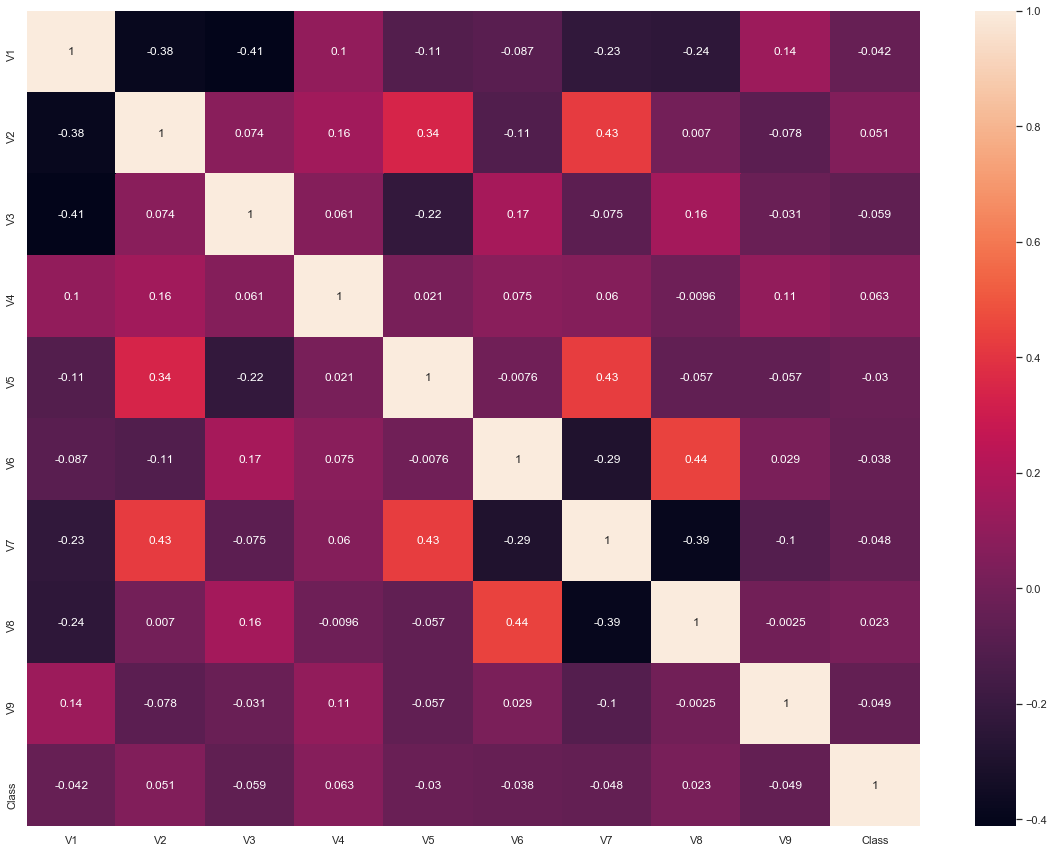

In [246]:
plt.figure(figsize = [20,15])
sns.heatmap(df[col1].corr('spearman'), annot = True)
plt.show()

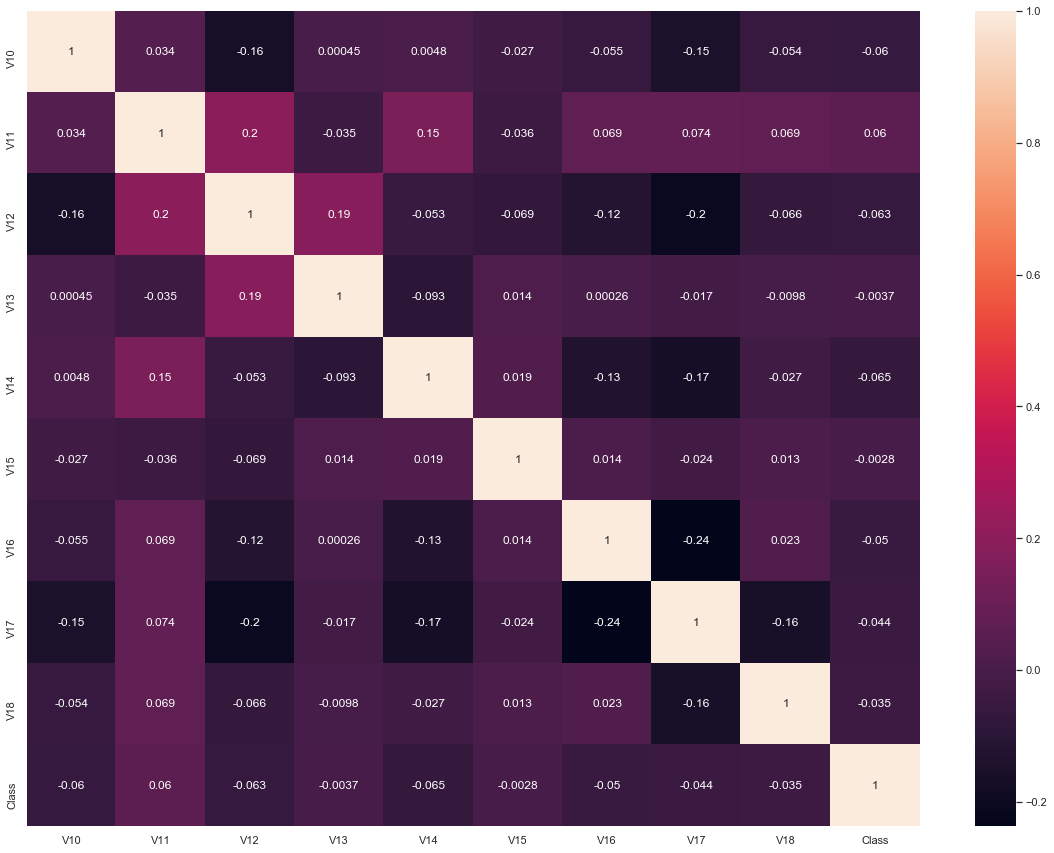

In [247]:
plt.figure(figsize = [20,15])
sns.heatmap(df[col2].corr('spearman'), annot = True)
plt.show()

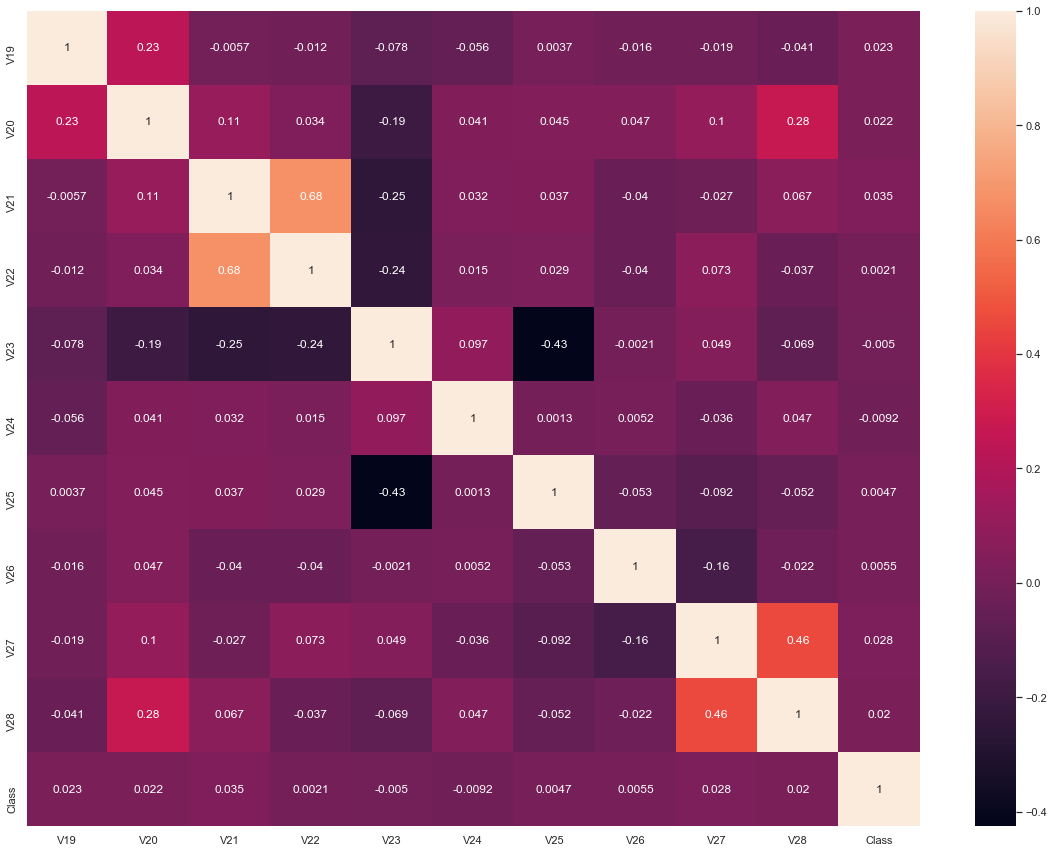

In [248]:
plt.figure(figsize = [20,15])
sns.heatmap(df[col3].corr('spearman'), annot = True)
plt.show()

Dropping columns 

<blockquote> <b> INTERIM RESULT - 4 : Dropping columns </blockquote> 
    Column 28 - because it has very less distribution towards class columns.

In [16]:
df = df.drop('V28', axis = 1)

In [ ]:
#Other columns that we can think of dropping - because of very LOW correlation rate
#colrm = ['V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V13', 'V15', 'V20', 'V6', 'V8', 'V19', 'V20'] 
#df = df.drop(colrm, axis = 1)


In [266]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27  Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558  149.62      0  
1 -0.339846  0.167170  0.125895 -0.008983    2.69      0  
2 -0.689281 -0.327642 -0.139097 -0.055353  378.66      0  
3 -1.175575  0.647376 -0.221929  0.062723  123.50      0  
4  0.141267 -0.206010  0.502292  0.219422   69.99      0  

[5 rows x 29 columns]

## Test & Train Split, working on 'Class' imbalanced dataset.

In [17]:
col = df.columns
col = col.drop('Class')

In [19]:
# Splitting data into train and test data sets
X = df[col]
y = df['Class']
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y, random_state = 100)



In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85443 entries, 262922 to 198375
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      85443 non-null  float64
 1   V2      85443 non-null  float64
 2   V3      85443 non-null  float64
 3   V4      85443 non-null  float64
 4   V5      85443 non-null  float64
 5   V6      85443 non-null  float64
 6   V7      85443 non-null  float64
 7   V8      85443 non-null  float64
 8   V9      85443 non-null  float64
 9   V10     85443 non-null  float64
 10  V11     85443 non-null  float64
 11  V12     85443 non-null  float64
 12  V13     85443 non-null  float64
 13  V14     85443 non-null  float64
 14  V15     85443 non-null  float64
 15  V16     85443 non-null  float64
 16  V17     85443 non-null  float64
 17  V18     85443 non-null  float64
 18  V19     85443 non-null  float64
 19  V20     85443 non-null  float64
 20  V21     85443 non-null  float64
 21  V22     85443 non-null  float

In [260]:
#normalizing the amount column - as its value varies a lot from low to high, it may give the larger cariation in analysis 
from sklearn.preprocessing import StandardScaler
st = StandardScaler()


In [269]:
col_amt = ['Amount']
X_train[col_amt] = st.fit_transform(X_train[col_amt])
X_test[col_amt] = st.transform(X_test[col_amt])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [263]:
X_train[col_amt].describe()

Amount
count  1.993640e+05
mean   2.779957e-18
std    1.000003e+00
min   -3.635209e-01
25%   -3.398470e-01
50%   -2.723105e-01
75%   -4.454232e-02
max    8.070722e+01

In [264]:
X_test[col_amt].describe()

Amount
count  85443.000000
mean       0.002885
std        1.101771
min       -0.363521
25%       -0.340878
50%       -0.274641
75%       -0.045945
max      105.596248

In [267]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### Checking the skewness of the matrix

In [273]:
X_train.skew(axis = 0, skipna = True)

V1        -3.352780
V2        -4.743314
V3        -2.115044
V4         0.671234
V5        -0.335423
V6         1.213213
V7        -1.054441
V8        -9.048266
V9         0.524853
V10        1.046184
V11        0.337235
V12       -2.187217
V13        0.067930
V14       -1.913552
V15       -0.311223
V16       -1.057503
V17       -3.526079
V18       -0.248354
V19        0.116720
V20       -1.377751
V21        3.490872
V22       -0.218690
V23       -6.872356
V24       -0.540695
V25       -0.429101
V26        0.567342
V27       -2.175241
Amount    13.520470
dtype: float64

In [276]:
X_test.skew(axis = 0, skipna = True)

V1        -3.113444
V2        -4.346729
V3        -2.525449
V4         0.688163
V5        -6.815259
V6         3.186612
V7         9.833696
V8        -7.113140
V9         0.623158
V10        1.496340
V11        0.400155
V12       -2.481376
V13        0.058943
V14       -2.180028
V15       -0.301884
V16       -1.196879
V17       -4.521379
V18       -0.286754
V19        0.091594
V20       -3.379285
V21        3.861446
V22       -0.200299
V23       -3.518366
V24       -0.580418
V25       -0.384656
V26        0.598146
V27        0.820133
Amount    22.862911
dtype: float64

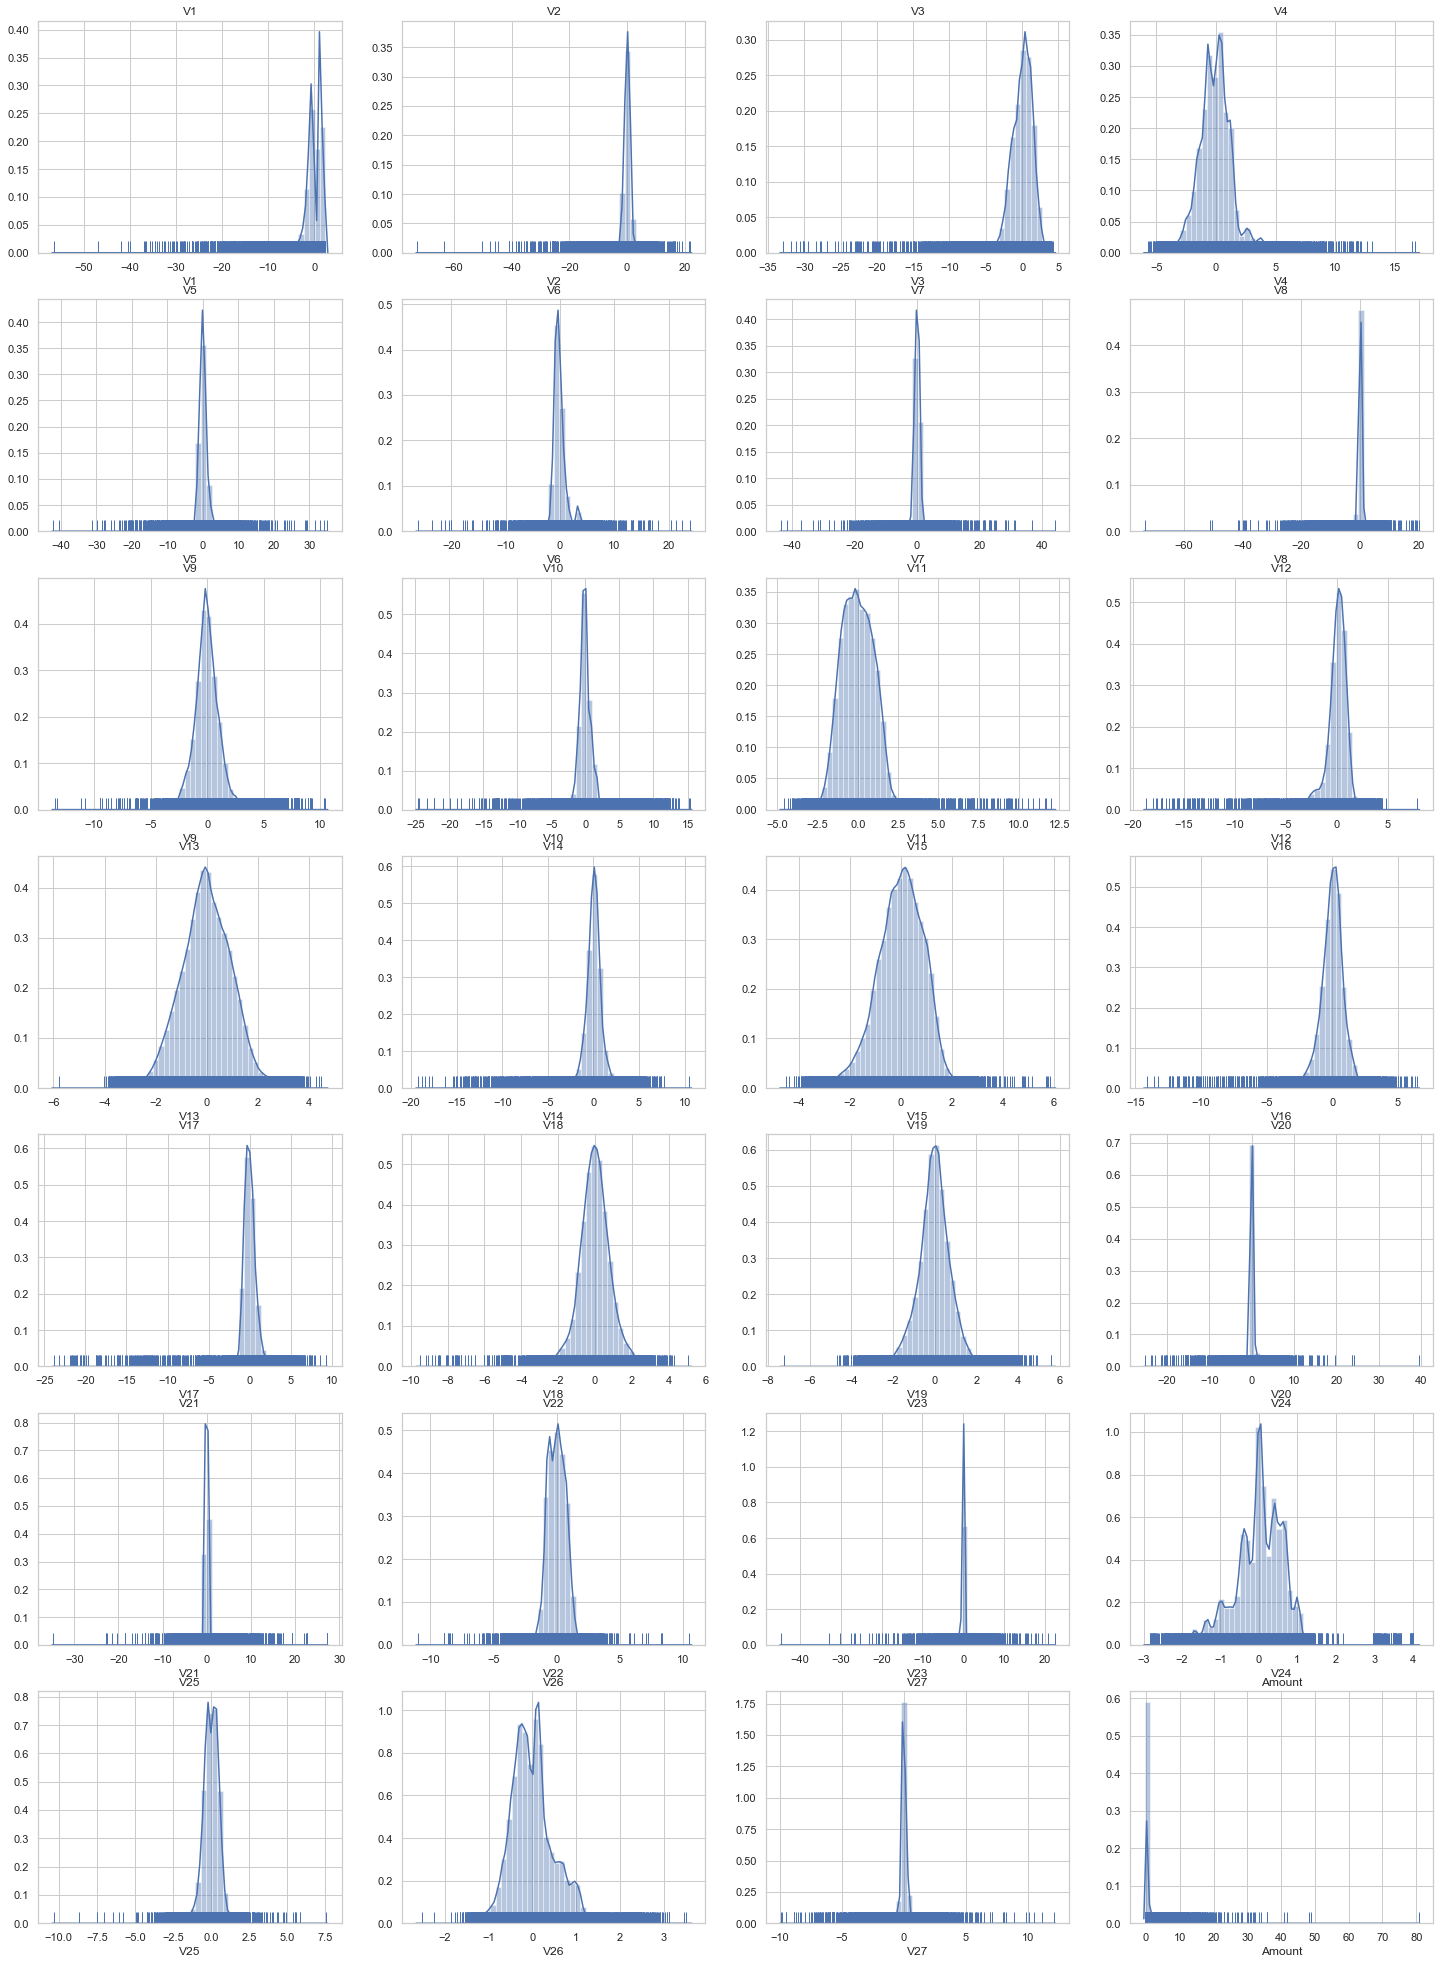

In [272]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(25, 35))
n = 1
for i in col:
    plt.subplot(7,4,n, autoscale_on = True, title = i)
    #plt.title(i)
    sns.distplot(X_train[i], rug = True)
    n= n+1

In [277]:
col_powertrans = ['V1', 'V2', 'V3', 'V8', 'V17', 'V21', 'V23', 'Amount']

In [278]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)

In [282]:
import warnings
warnings.filterwarnings("ignore")

X_train[col_powertrans] = pt.fit_transform(X_train[col_powertrans])
X_test[col_powertrans] = pt.transform(X_test[col_powertrans])

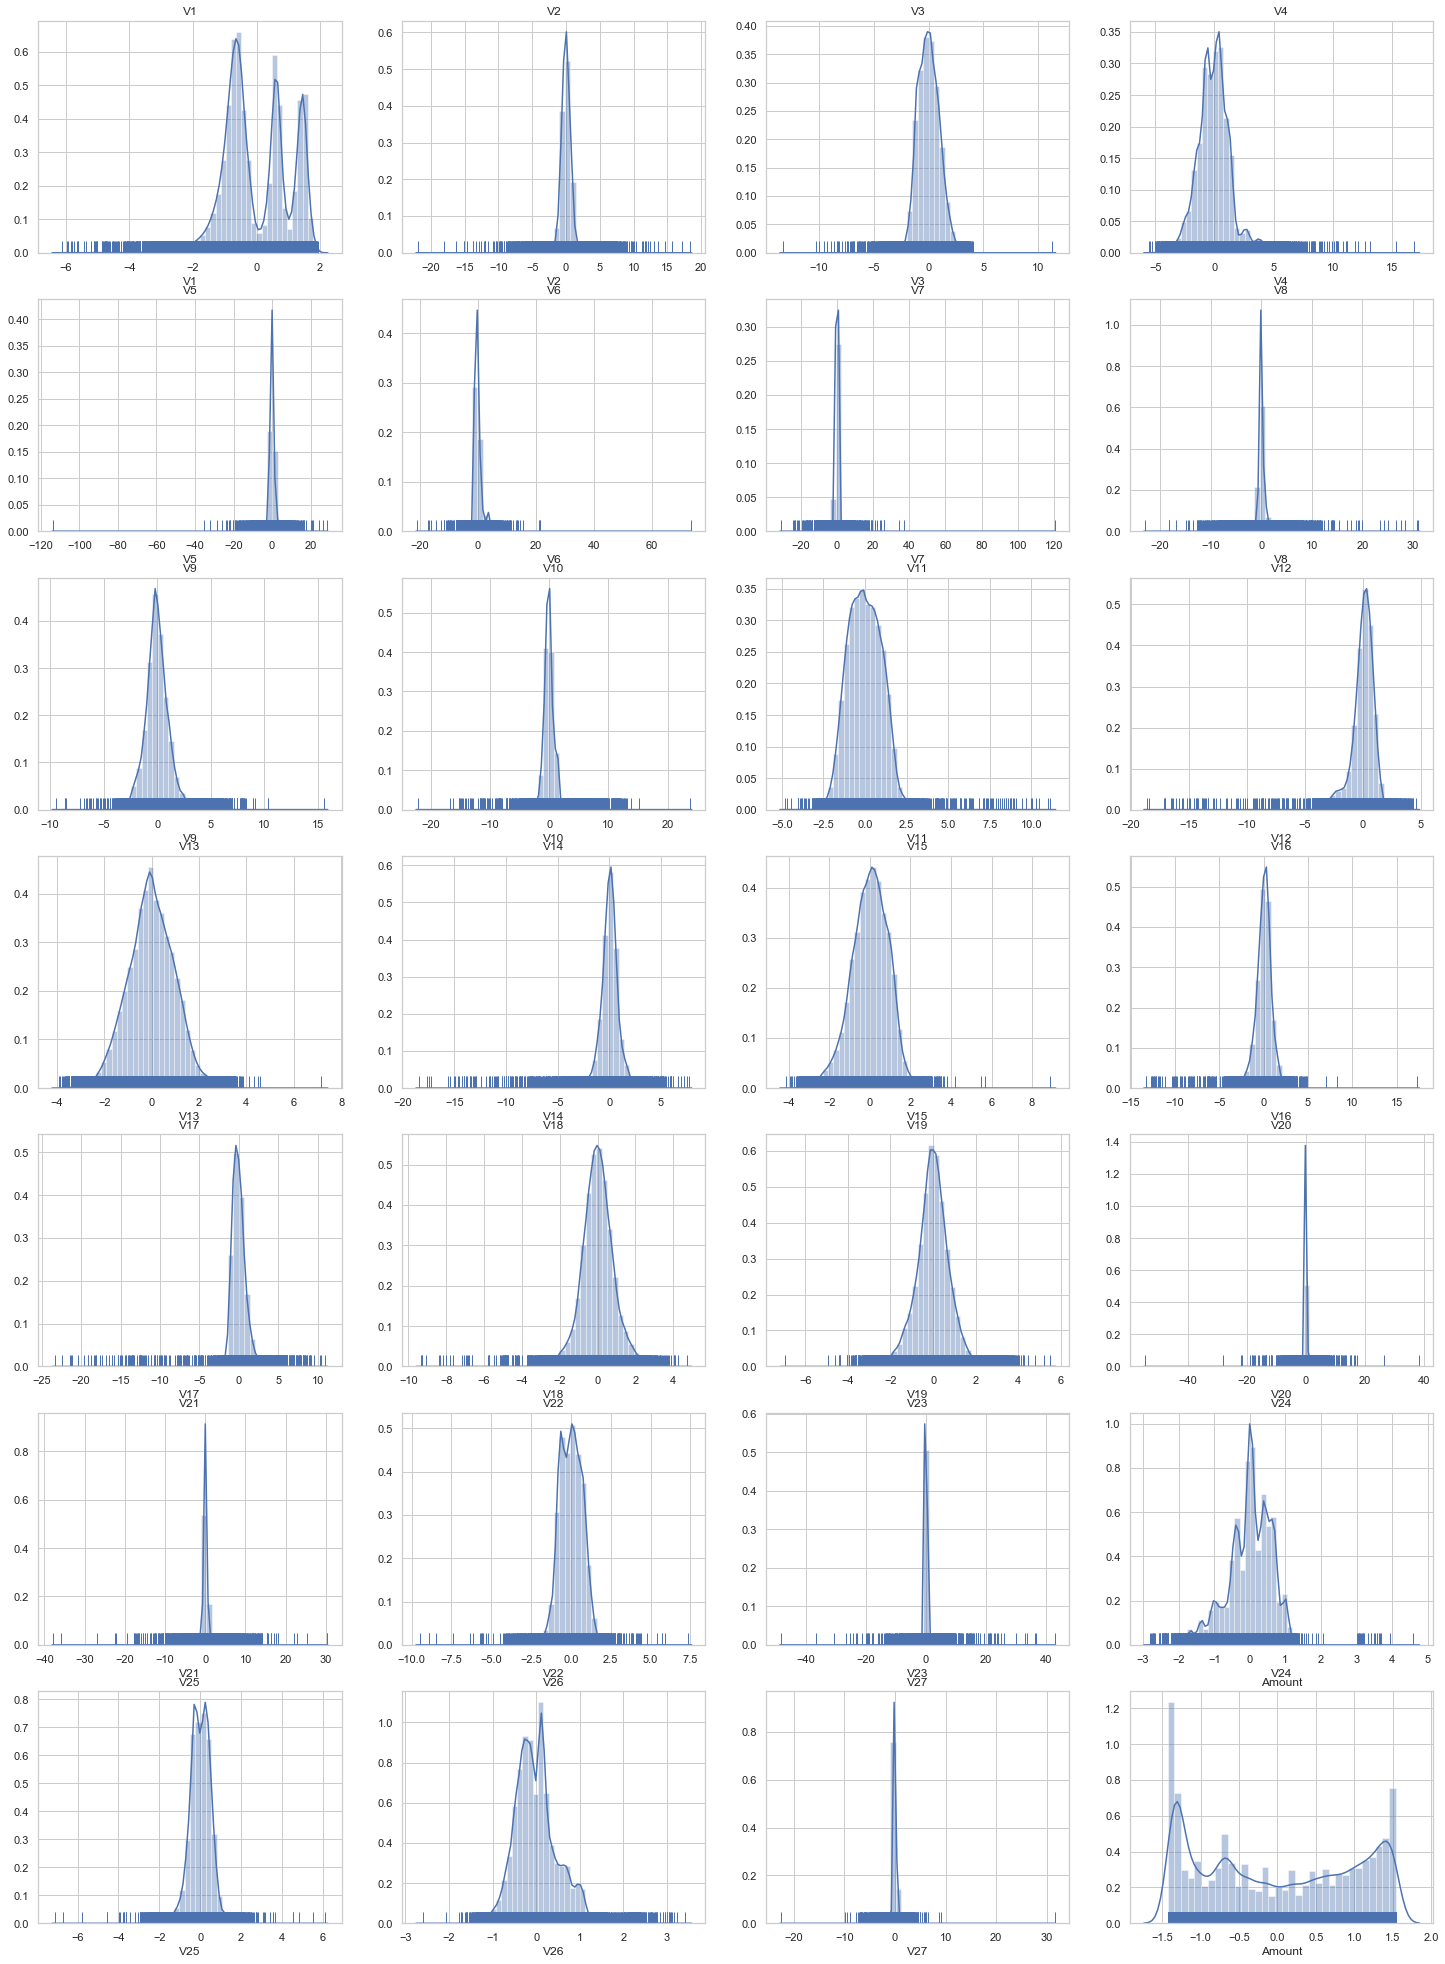

In [284]:
plt.figure(figsize=(25, 35))
n = 1
for i in col:
    plt.subplot(7,4,n, autoscale_on = True, title = i)
    #plt.title(i)
    sns.distplot(X_test[i], rug = True)
    n= n+1

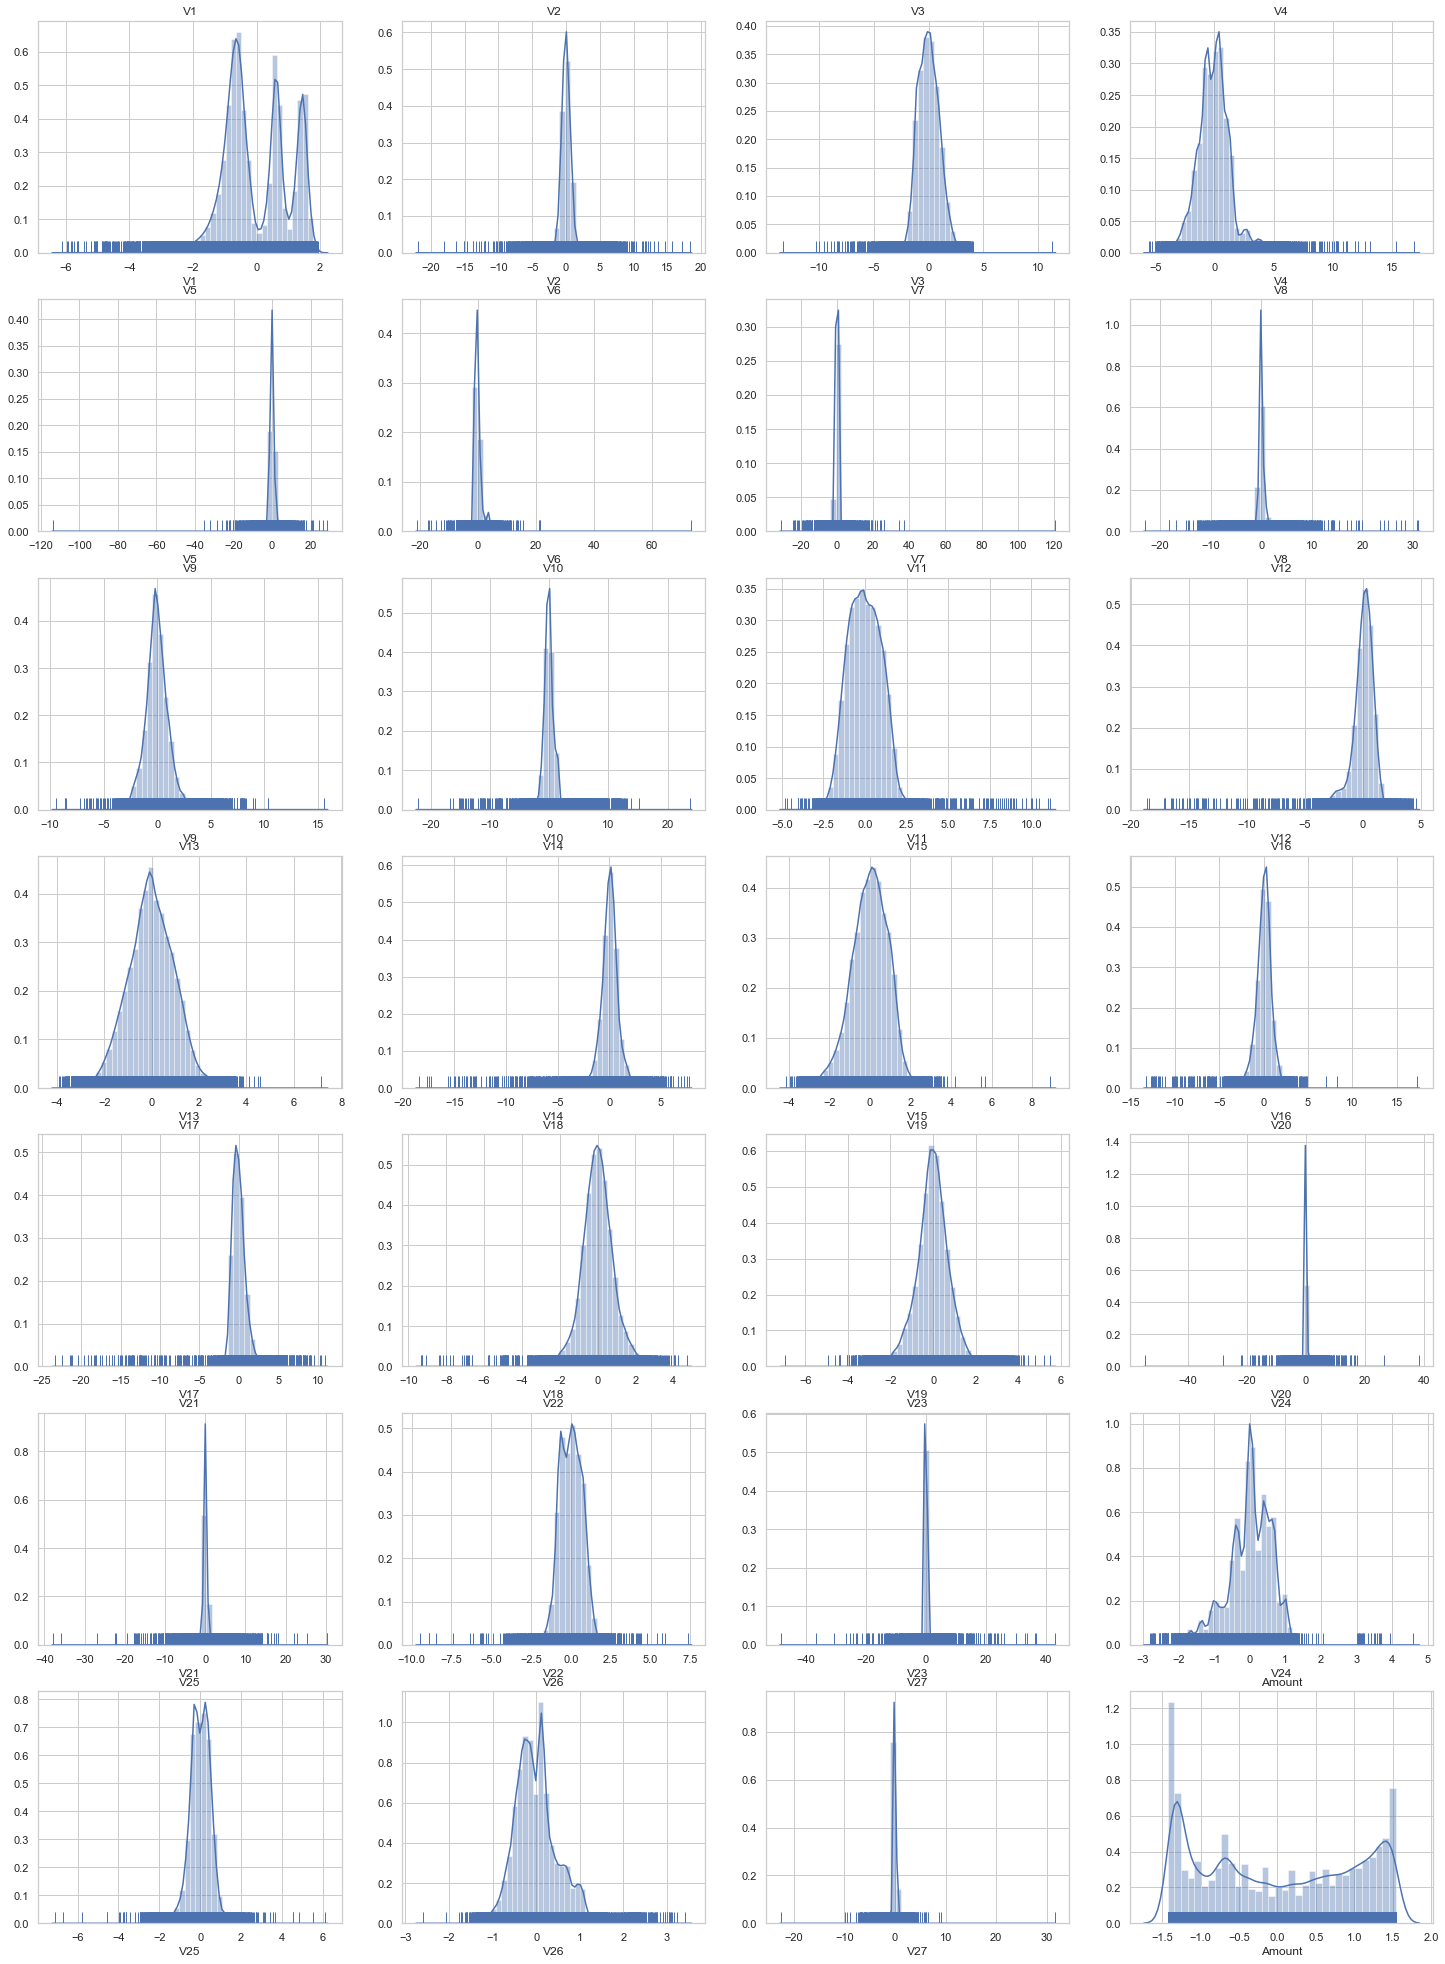

In [283]:
plt.figure(figsize=(25, 35))
n = 1
for i in col:
    plt.subplot(7,4,n, autoscale_on = True, title = i)
    #plt.title(i)
    sns.distplot(X_test[i], rug = True)
    n= n+1

In [285]:
X_test.skew(axis = 0, skipna = True)

V1       -0.097717
V2       -0.121950
V3       -0.114645
V4        0.688163
V5       -6.815259
V6        3.186612
V7        9.833696
V8        1.870797
V9        0.623158
V10       1.496340
V11       0.400155
V12      -2.481376
V13       0.058943
V14      -2.180028
V15      -0.301884
V16      -1.196879
V17      -1.820320
V18      -0.286754
V19       0.091594
V20      -3.379285
V21      -0.167674
V22      -0.200299
V23       2.134930
V24      -0.580418
V25      -0.384656
V26       0.598146
V27       0.820133
Amount    0.080268
dtype: float64

In [286]:
X_train.skew(axis = 0, skipna = True)

V1       -0.100373
V2       -0.141888
V3       -0.098566
V4        0.671234
V5       -0.335423
V6        1.213213
V7       -1.054441
V8        0.812028
V9        0.524853
V10       1.046184
V11       0.337235
V12      -2.187217
V13       0.067930
V14      -1.913552
V15      -0.311223
V16      -1.057503
V17      -1.162855
V18      -0.248354
V19       0.116720
V20      -1.377751
V21      -1.418001
V22      -0.218690
V23      -0.988759
V24      -0.540695
V25      -0.429101
V26       0.567342
V27      -2.175241
Amount    0.068979
dtype: float64

<blockquote> <b> INTERIM RESULT - 5 : Removed Skewness </blockquote> 
    Skewness removes from the PCA transfomred data - for Train and Test set both

## Model Building - on imbalanced Data
Logistic Regression, KNN, Decision Tree, Random Forest and XG Boost

Step 1 - select TOP (X) features from the list of 27 features

In [287]:
X_train.index = pd.RangeIndex(0, len(X_train.index))
y_train.index = pd.RangeIndex(0, len(y_train.index))

In [288]:
X_test.index = pd.RangeIndex(0, len(X_test.index))
y_test.index = pd.RangeIndex(0, len(y_test.index))

In [289]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.478817 -0.171524 -0.824813  0.420978 -0.225796 -1.159629  0.082871   
1 -0.195504  0.711308 -0.413617 -0.557452  1.014727 -0.801985  1.042734   
2  1.580752  0.068256 -1.400188 -0.067032  0.815822 -1.358596  0.843943   
3 -0.478613 -0.008890  1.327283 -0.884417 -0.371977 -0.062313 -0.144740   
4 -0.520943  1.298474 -0.832755  1.064853  1.239594 -0.633668  1.100319   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0 -0.294644  0.733270  0.102520  ...  0.083010 -0.313465 -0.396942 -0.779702   
1 -0.230133 -0.200830 -0.863839  ... -0.226373  0.084311 -0.443596 -0.755443   
2 -0.615664  0.009745 -0.021497  ...  0.126100 -0.133286  0.223476  0.611995   
3  0.094701 -1.843755  0.520706  ...  1.690163  0.295444  0.201016  0.217167   
4  0.154288 -0.917002 -0.844362  ...  0.585502  0.024939  0.095475  0.366613   

        V23       V24       V25       V26       V27    Amount  
0  0.587803 -0.048183 -0.356438  0.205392 -0.075806 -1.317255  
1  0.119385  0.587098 -0.383245  0.110292  0.229167 -1.201707  
2 -0.054588  0.824538  0.505014  0.203037 -0.083225 -1.056219  
3 -0.033217  0.016538 -0.326120 -0.285113  0.118226 -0.148701  
4 -0.414876  0.494710  0.091257 -0.398552  0.330173 -0.927320  

[5 rows x 28 columns]

#### MODEL #1 : Linear Regression

In [290]:
# Model #1 ::  Logistic Regression
# Assessing the model with StatsModels for logistic regression based model using top 14 features, selected using RFE   
log_r = LogisticRegression()
rfe = RFE(log_r, 14)
rfe = rfe.fit(X_train, y_train)

In [291]:
#feature list 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', False, 5),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 6),
 ('V6', False, 15),
 ('V7', False, 13),
 ('V8', True, 1),
 ('V9', False, 14),
 ('V10', True, 1),
 ('V11', False, 8),
 ('V12', False, 11),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', False, 4),
 ('V18', False, 12),
 ('V19', False, 9),
 ('V20', False, 10),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 7),
 ('V24', True, 1),
 ('V25', False, 3),
 ('V26', True, 1),
 ('V27', False, 2),
 ('Amount', True, 1)]

In [292]:
col_lr = X_train.columns[rfe.support_]

In [294]:
X_train_rfe = X_train[col_lr]

In [295]:
X_train_sm = sm.add_constant(X_train_rfe)
lgr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lgm = lgr1.fit()

In [296]:
y_train_pred = lgm.predict(X_train_sm)

In [298]:
y_train_pred[:11]

0     0.000199
1     0.000311
2     0.000242
3     0.000046
4     0.002065
5     0.000046
6     0.001526
7     0.000193
8     0.000991
9     0.000195
10    0.000368
dtype: float64

In [299]:
y_train_pred = np.array(y_train_pred)

In [300]:
y_train_pred[:11]

array([1.99392150e-04, 3.11359040e-04, 2.41783023e-04, 4.58579627e-05,
       2.06458975e-03, 4.55716550e-05, 1.52641178e-03, 1.93210963e-04,
       9.91099080e-04, 1.95056258e-04, 3.68340478e-04])

In [302]:
y_train_pred.reshape(-1)

array([0.00019939, 0.00031136, 0.00024178, ..., 0.0002327 , 0.00017175,
       0.00064941])

In [303]:
# Creating a dataframe with the actual 'Class' flag and the predicted 'Class' probabilities
y_train_pred_df = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_df.head()

Class  Class_Prob
0      0    0.000199
1      0    0.000311
2      0    0.000242
3      0    0.000046
4      0    0.002065

In [304]:
# Plotting the ROC Curve using 'draw_roc' function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

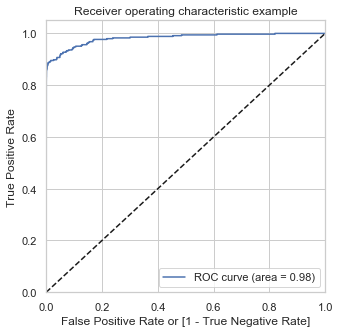

In [305]:
draw_roc(y_train_pred_df.Class, y_train_pred_df.Class_Prob)

In [306]:
#good ROC curve, but this data is imbalanced dataset. We need to focus on F-score (Precision&Recall)



In [307]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs within the y_train_pred_df dataframe
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()


Class  Class_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.000199    1    0    0    0    0    0    0    0    0    0
1      0    0.000311    1    0    0    0    0    0    0    0    0    0
2      0    0.000242    1    0    0    0    0    0    0    0    0    0
3      0    0.000046    1    0    0    0    0    0    0    0    0    0
4      0    0.002065    1    0    0    0    0    0    0    0    0    0

In [308]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci','prec'])

In [309]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cml = cm(y_train_pred_df.Class.astype(int), y_train_pred_df[i])
    total = sum(sum(cml))
    accuracy = (cml[0,0] + cml[1,1])/total
    sensi = cml[1,1]/(cml[1,0] + cml[1,1])
    speci = cml[0,0]/(cml[0,0] + cml[0,1])
    prec = cml[1,1]/(cml[1,1] + cml[0,1])
    cutoff_df.loc[i] = [i,accuracy, sensi, speci, prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.001725  1.000000  0.000000  0.001725
0.1   0.1  0.999293  0.793605  0.999648  0.795918
0.2   0.2  0.999273  0.750000  0.999704  0.813880
0.3   0.3  0.999303  0.709302  0.999804  0.862191
0.4   0.4  0.999303  0.677326  0.999859  0.892720
0.5   0.5  0.999273  0.651163  0.999874  0.899598
0.6   0.6  0.999233  0.622093  0.999884  0.902954
0.7   0.7  0.999207  0.601744  0.999894  0.907895
0.8   0.8  0.999152  0.569767  0.999894  0.903226
0.9   0.9  0.999097  0.537791  0.999894  0.898058


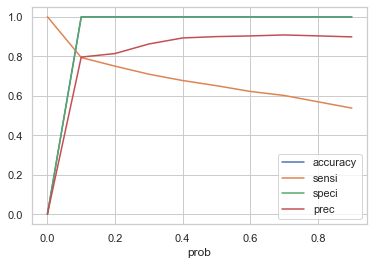

In [313]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi','speci','prec'])
plt.show()

From the graph and confusion matrix table 'precision' and 'recall' or 'senstivity' values, its clear that cutoff value of 0.1 is relatively ideal as both the 'precision' and 'recall' scores are about 80%. Accuracy, here is great but as data is imbalanced, its not great metric in isolation

In [314]:
y_train_pred_df['pred_Class_Value_0.1'] = y_train_pred_df.Class_Prob.map(lambda x:1 if x >= 0.1 else 0)



In [315]:
prtr = metrics.precision_score(y_train_pred_df.Class.astype(int), y_train_pred_df['pred_Class_Value_0.1'])
rectr = metrics.recall_score(y_train_pred_df.Class.astype(int), y_train_pred_df['pred_Class_Value_0.1'])

In [337]:
f1tr = 2*prtr*rectr/(prtr+rectr)
print("F- Score, LR model, Train Pred ",f1tr)

F- Score, LR model, Train Pred  0.7947598253275108


In [318]:
col_lr

Index(['V1', 'V3', 'V4', 'V8', 'V10', 'V13', 'V14', 'V15', 'V16', 'V21', 'V22',
       'V24', 'V26', 'Amount'],
      dtype='object')

In [320]:
X_test_rfe = X_test[col_lr]

In [321]:
X_test_sm = sm.add_constant(X_test_rfe)
y_test_pred = lgm.predict(X_test_sm)
y_test_pred = np.array(y_test_pred)

In [322]:
y_test_pred.reshape(-1)

array([0.00221128, 0.00474148, 0.0002359 , ..., 0.00024185, 0.00029965,
       0.00170688])

In [323]:
y_test_pred_df = pd.DataFrame()
y_test_pred_df['Class'] = y_test
y_test_pred_df['Class_prob'] = y_test_pred
y_test_pred_df['Class_pred_0.1'] = y_test_pred_df.Class_prob.map(lambda x:1 if x >= 0.1 else 0)



In [331]:
print("Accuracy : ", metrics.accuracy_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

Accuracy :  0.9990285921608558


In [330]:
print("Precision : ",metrics.precision_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

Precision :  0.7018633540372671


In [332]:
print("Recall : ",metrics.recall_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

Recall :  0.7635135135135135


In [333]:
#check the F-score for Test_predicted Dataset and compare with Train-pred dataset

In [334]:
prt = metrics.precision_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1'])
rect = metrics.recall_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1'])

In [338]:
f1t = 2*prt*rect/(prt+rect)
print("F-Score, LR model, TestPred",f1t)

F-Score, LR model, TestPred 0.7313915857605178


In [339]:
#F1 scores of both train and test data doesnt have high difference. train F1 being around 80% and test F1 being 73%


In [ ]:
#trying after adding column 27 which has RANK 2 in the RFE

In [377]:
col_lr

['V1',
 'V3',
 'V4',
 'V8',
 'V10',
 'V13',
 'V14',
 'V15',
 'V16',
 'V21',
 'V22',
 'V24',
 'V26',
 'Amount',
 'V27']

In [343]:
col_lr= list(col_lr)

In [344]:
col_lr.append('V27')

In [346]:
X_train_rfe_1 = X_train[col_lr]

In [347]:
X_train_sm = sm.add_constant(X_train_rfe_1)
lgr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lgm = lgr1.fit()

In [348]:
y_train_pred = lgm.predict(X_train_sm)

In [349]:
y_train_pred[:10]

0    0.000208
1    0.000304
2    0.000251
3    0.000043
4    0.001929
5    0.000047
6    0.001406
7    0.000181
8    0.000981
9    0.000206
dtype: float64

In [350]:
y_train_pred = np.array(y_train_pred)

In [351]:
y_train_pred[:10]

array([2.08324987e-04, 3.04387396e-04, 2.51191290e-04, 4.34133986e-05,
       1.92876514e-03, 4.73424467e-05, 1.40555371e-03, 1.80806360e-04,
       9.81480168e-04, 2.05840217e-04])

In [357]:
y_train_pred.reshape(-1)

array([0.00020832, 0.00030439, 0.00025119, ..., 0.00022419, 0.00017395,
       0.00059991])

In [353]:
# Creating a dataframe with the actual 'Class' flag and the predicted 'Class' probabilities
y_train_pred_df = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_df.head()

Class  Class_Prob
0      0    0.000208
1      0    0.000304
2      0    0.000251
3      0    0.000043
4      0    0.001929

In [358]:
# Plotting the ROC Curve using 'draw_roc' function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

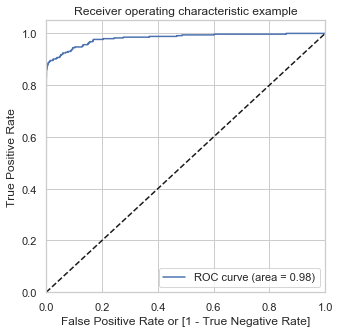

In [359]:
draw_roc(y_train_pred_df.Class, y_train_pred_df.Class_Prob)

In [360]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs within the y_train_pred_df dataframe
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

Class  Class_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.000208    1    0    0    0    0    0    0    0    0    0
1      0    0.000304    1    0    0    0    0    0    0    0    0    0
2      0    0.000251    1    0    0    0    0    0    0    0    0    0
3      0    0.000043    1    0    0    0    0    0    0    0    0    0
4      0    0.001929    1    0    0    0    0    0    0    0    0    0

In [361]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci','prec'])

In [362]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cml = cm(y_train_pred_df.Class.astype(int), y_train_pred_df[i])
    total = sum(sum(cml))
    accuracy = (cml[0,0] + cml[1,1])/total
    sensi = cml[1,1]/(cml[1,0] + cml[1,1])
    speci = cml[0,0]/(cml[0,0] + cml[0,1])
    prec = cml[1,1]/(cml[1,1] + cml[0,1])
    cutoff_df.loc[i] = [i,accuracy, sensi, speci, prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.001725  1.000000  0.000000  0.001725
0.1   0.1  0.999318  0.796512  0.999668  0.805882
0.2   0.2  0.999273  0.752907  0.999699  0.811912
0.3   0.3  0.999288  0.703488  0.999799  0.858156
0.4   0.4  0.999298  0.674419  0.999859  0.892308
0.5   0.5  0.999258  0.645349  0.999869  0.895161
0.6   0.6  0.999218  0.619186  0.999874  0.894958
0.7   0.7  0.999207  0.601744  0.999894  0.907895
0.8   0.8  0.999147  0.566860  0.999894  0.902778
0.9   0.9  0.999092  0.534884  0.999894  0.897561


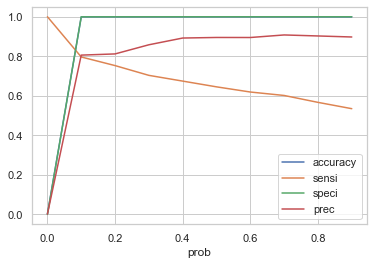

In [363]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi','speci','prec'])
plt.show()

In [364]:
y_train_pred_df['pred_Class_Value_0.1'] = y_train_pred_df.Class_Prob.map(lambda x:1 if x >= 0.1 else 0)

In [365]:
prtr = metrics.precision_score(y_train_pred_df.Class.astype(int), y_train_pred_df['pred_Class_Value_0.1'])
rectr = metrics.recall_score(y_train_pred_df.Class.astype(int), y_train_pred_df['pred_Class_Value_0.1'])

In [366]:
f1tr = 2*prtr*rectr/(prtr+rectr)
print(f1tr)

0.8011695906432749


In [368]:
X_test_rfe_1 = X_test[col_lr]

In [369]:
X_test_sm = sm.add_constant(X_test_rfe_1)
y_test_pred = lgm.predict(X_test_sm)
y_test_pred = np.array(y_test_pred)

In [370]:
y_test_pred.reshape(-1)

array([0.0022441 , 0.0045467 , 0.00023484, ..., 0.00024515, 0.0002497 ,
       0.00220632])

In [371]:
y_test_pred_df = pd.DataFrame()
y_test_pred_df['Class'] = y_test
y_test_pred_df['Class_prob'] = y_test_pred
y_test_pred_df['Class_pred_0.1'] = y_test_pred_df.Class_prob.map(lambda x:1 if x >= 0.1 else 0)



In [372]:
print(metrics.accuracy_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

0.9990285921608558


In [373]:
print(metrics.precision_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

0.7018633540372671


In [374]:
print(metrics.recall_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1']))

0.7635135135135135


In [375]:
prt = metrics.precision_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1'])
rect = metrics.recall_score(y_test_pred_df.Class.astype(int), y_test_pred_df['Class_pred_0.1'])

In [376]:
f1t = 2*prt*rect/(prt+rect)
print("F-Score, LR model, TestPred",f1t)

F-Score, LR model, TestPred 0.7313915857605178



<blockquote> <b> INTERIM RESULT - 6 : Linear Regrassion model </blockquote> 
    #F1 scores of both train and test data doesnt have high difference again, train F1 being 80% and test F1 being 73%


#### MODEL #2 : decision tree classifier

In [378]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [381]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [382]:
y_pred_train = model_dtc.predict(X_train)

In [383]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.96      0.83      0.89       344

    accuracy                           1.00    199364
   macro avg       0.98      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [384]:
y_pred=model_dtc.predict(X_test)

In [385]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.77      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443




<blockquote> <b> INTERIM RESULT - 7 : Decision Tree classifier </blockquote> 
    Recall value shows that out of total 100 FRAUD cases only 77 were bring correctly identified!! this is because of the imbalance in the data 


In [387]:
print(confusion_matrix(y_test,y_pred))

[[85282    13]
 [   34   114]]


In [392]:
from imblearn.metrics import sensitivity_specificity_support

In [393]:
print('{0:.2f}'.format(accuracy_score(y_test,y_pred)))

1.00


In [394]:
#Since the number of 1's are very less the zeros is pulling accuracy towards 100 percent.
# But we can see poor performance in precision and recall scores

In [395]:
from sklearn.model_selection import KFold

In [396]:
kf=KFold(n_splits=5,random_state=60,shuffle=True)

In [397]:
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]



TRAIN: [     0      1      2 ... 199360 199361 199362] TEST: [     4     12     22 ... 199334 199349 199363]
TRAIN: [     2      3      4 ... 199360 199362 199363] TEST: [     0      1      5 ... 199350 199355 199361]
TRAIN: [     0      1      2 ... 199360 199361 199363] TEST: [     3     11     16 ... 199353 199357 199362]
TRAIN: [     0      1      2 ... 199361 199362 199363] TEST: [     9     19     35 ... 199356 199358 199360]
TRAIN: [     0      1      3 ... 199361 199362 199363] TEST: [     2      6      7 ... 199347 199354 199359]


In [398]:
# Tuning Hyperprameters
#model depth
tree_depth=5
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model_dtc=DecisionTreeClassifier(max_depth=tree_depth)
    model_dtc.fit(X_train_cv,y_train_cv)
    y_pred=model_dtc.predict(X_test_cv)
    print('for model depth of :', str(tree_depth),'classification scores are:\n',classification_report(y_pred,y_test_cv))
    tree_depth=tree_depth+1

TRAIN: [     0      1      2 ... 199360 199361 199362] TEST: [     4     12     22 ... 199334 199349 199363]
for model depth of : 5 classification scores are:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39816
           1       0.78      0.88      0.83        57

    accuracy                           1.00     39873
   macro avg       0.89      0.94      0.91     39873
weighted avg       1.00      1.00      1.00     39873

TRAIN: [     2      3      4 ... 199360 199362 199363] TEST: [     0      1      5 ... 199350 199355 199361]
for model depth of : 6 classification scores are:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39815
           1       0.69      0.88      0.77        58

    accuracy                           1.00     39873
   macro avg       0.84      0.94      0.89     39873
weighted avg       1.00      1.00      1.00     39873

TRAIN: [     0      1     


<blockquote> <b> INTERIM RESULT - 8 : Decision Tree - hyperparameter tuning, KNN folds </blockquote> 
    best train score is coming from model with Depth = 8 



#### MODEL #3 : Random Forest

In [400]:
#define a random state
state =1 

#define the outlier detection methods
classifiers = {
    "Isolation Forest" : IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor" : LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [401]:
#Fit the model
n_outliers = len (Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliwers
    if clf_name == "Local Outlier Factor" : 
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    
    #REshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    #run classification metrics
    
    print('{}:{}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report (Y, y_pred))

Isolation Forest:651
0.9977142415741186
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor:985
0.9965415175891043
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [402]:
rfc=RandomForestClassifier(class_weight="balanced") # for class imbalance

In [403]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199364 entries, 0 to 199363
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22     19

In [404]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [405]:
# Making predictions
pred_train = rfc.predict(X_train)

In [406]:
# Let's check the report of our default model
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [407]:
#lets see scores on test datasaet

In [408]:
pred_test = rfc.predict(X_test)

In [409]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#We can clearly see significant dip in metric scores such as F1, precision and recall which signifies model's suffering from overfitting. Will now tune the model using GridSearch and validate using K-fold as well


In [411]:
# Hyper parameter Tuning
# First will get the apt value of 'max_depth' 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
#TO USE STRATIFIED K FOLD

n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 50, 5)}

# instantiate the base model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rfd = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rfd.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

float64


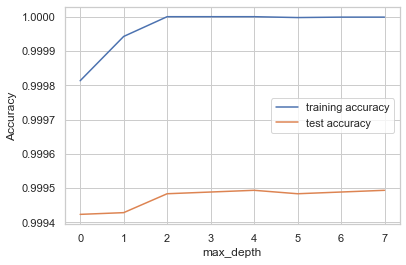

In [412]:
# scores of GridSearch CV
scores = rfd.cv_results_
print(scores["mean_train_score"].dtype)
# plotting accuracies with max_depth
plt.figure()
plt.plot(#scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(#scores["param_max_depth"],
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [413]:
print(scores["param_max_depth"])
print(scores["mean_train_score"])

[10 15 20 25 30 35 40 45]
[0.99981316 0.99994232 1.         1.         1.         0.99999749
 0.99999875 0.99999875]


In [414]:
print(scores["param_max_depth"])
print(scores["mean_test_score"])

[10 15 20 25 30 35 40 45]
[0.99942317 0.99942818 0.99948336 0.99948837 0.99949339 0.99948336
 0.99948837 0.99949339]


In [415]:
print(scores)

{'mean_fit_time': array([39.57174144, 41.14568739, 42.56984429, 41.68524671, 42.1149457 ,
       39.55998774, 42.26828637, 43.40154243]), 'std_fit_time': array([1.51832587, 0.58998251, 1.4374875 , 1.11983858, 1.90678987,
       0.9121486 , 1.75199865, 1.99985451]), 'mean_score_time': array([0.15149341, 0.16095462, 0.16525354, 0.16131802, 0.16198373,
       0.15406775, 0.16846242, 0.17768893]), 'std_score_time': array([0.00395411, 0.007616  , 0.00695511, 0.00520707, 0.00311318,
       0.0024011 , 0.00742159, 0.01981657]), 'param_max_depth': masked_array(data=[10, 15, 20, 25, 30, 35, 40, 45],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}, {'max_depth': 30}, {'max_depth': 35}, {'max_depth': 40}, {'max_depth': 45}], 'split0_test_score': array([0.99937301, 0.99939809, 0.99944825, 0.99947333, 0.99947333,
       0.99944825, 0.999

#### MODEL #4 : K Nearest Neighbors (not to be used - taking LOONG time to compute !! 

#X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=66)

k_range = range(1, 11)
score1=[]
score2=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=6 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

#### MODEL #5 : XG Boost

In [24]:
from xgboost import XGBClassifier

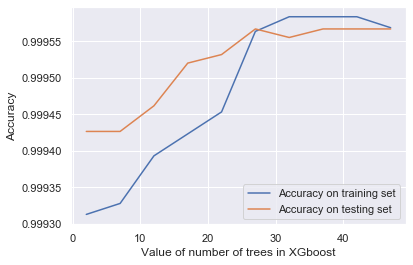

In [27]:
X_train,X_test,y_train,y_test =train_test_split(X,y, train_size = 0.7, test_size = 0.3, stratify=y, random_state=66)

tree_range = range(2, 50, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train)) #used wehen dataset is balanced and NOT for minority class problem
    score2.append(xgb.score(X_test,y_test)) #used when dataset is balanced and NOT for minority class problem
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
xgb=XGBClassifier(n_estimators=40)
xgb.fit(X_train,y_train)
print('Accuracy of XGB on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB on the testing dataset is :1.000


### XG boost with predict proba 

In [31]:
#BUT this is imbalanced dataset - we CAN NOT use the XGB.SCORE !! we have to use PREDIT_PROBA method
#XG BOOST with PREDICT PROBA

In [72]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27  Amount  Class  
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558  149.62      0  
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983    2.69      0  
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353  378.66      0  
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  123.50      0  
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   69.99      0

In [73]:
df.shape

(284807, 29)

In [74]:
col = df.columns
col = col.drop('Class')

In [107]:
X = df[col]
y = df.loc[ : , ['Class']]

In [198]:
X_train,X_test,y_train,y_test =train_test_split(X,y, train_size = 0.7, test_size = 0.3, stratify=y, random_state=66)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#Making XGBOOST model - 1 - decision Tree

########
Accuraacy on training :  0.9996338355971991
Accuraacy on test :  0.999602073897218
########
confusion matrix
[[199010     63]
 [    10    281]]
confusion matrix
[[85291    30]
 [    4   118]]
########
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85321
           1       0.80      0.97      0.87       122

    accuracy                           1.00     85443
   macro avg       0.90      0.98      0.94     85443
weighted avg       1.00      1.00      1.00     85443

########
area under AUC curve is : 0.9860563814297914


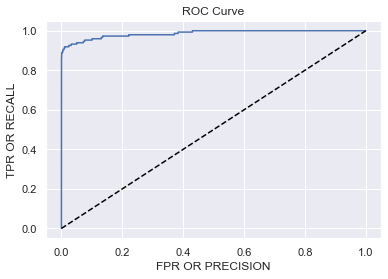

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

model_xg = XGBClassifier(objective = 'reg:logistic')
model_xg.fit(X_train,y_train)

print ('########')

print("Accuraacy on training : ", model_xg.score(X_train, y_train))
print("Accuraacy on test : ", model_xg.score(X_test, y_test))

print ('########')

y_train_pred = model_xg.predict(X_train)
print('confusion matrix')
print(confusion_matrix(y_train_pred, y_train))

y_test_pred = model_xg.predict(X_test)
print('confusion matrix')
print(confusion_matrix(y_test_pred, y_test))

print ('########')
print(classification_report(y_test_pred, y_test))
print ('########')

#ROC and AUC
y_score = model_xg.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test, y_score)

plt.title('ROC Curve')
plt.xlabel('FPR OR PRECISION')
plt.ylabel('TPR OR RECALL')

plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed' , color = 'black')
plt.show
print('area under AUC curve is :', auc(fpr,tpr))

In [151]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)
## Feature reduction using RFE
    
print(X_lasso.shape)
print(pos)

(199364, 13)
[ 2  3  4  6  8  9 10 11 13 15 16 17 27]


In [152]:
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Amount']


In [153]:
#default hyperparameter
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [155]:
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[85280    15]
 [   29   119]]
Accuracy of Decision Tree : 0.9994850368081645


In [134]:
#using XGBOOST model with classification - XGBClassifier. Model fitting with model.fit()

EPOCHS = 2
kf = StratifiedKFold(n_splits = EPOCHS, shuffle = True)

for tr_idx, val_idx in kf.split(X_train, y_train):
    model = XGBClassifier()
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict_proba(X_test)
    #predcitions = [round(value) for value in y_pred]

    #measure AUC
    roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
    print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.61%
AUC: 98.61%


In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


EPOCHS = 2
kf = StratifiedKFold(n_splits = EPOCHS, shuffle = True)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, cv=kf, scoring="accuracy", return_train_score = 'True')
tree.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
       

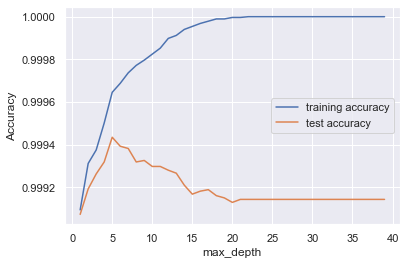

In [141]:
score = tree.cv_results_
#pd.DataFrame(score).head()

plt.figure()
plt.plot(score["param_max_depth"], score["mean_train_score"], label="training accuracy")
plt.plot(score["param_max_depth"], score["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [112]:
#using XGBOOST model with classification - XGBClassifier. Model fitting with model.fit()

tree_range = range(2, 30, 5)

EPOCHS = 5
kf = StratifiedKFold(n_splits = EPOCHS, shuffle = True)

score1=[]
score2=[]

for tree in tree_range:

    model = XGBClassifier()
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict_proba(X_test)
    #predcitions = [round(value) for value in y_pred]

    #measure AUC
    roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
    print("AUC: %.2f%%" % (roc * 100.0))

Accuracy: 99.96%


In [ ]:
#Using feature reduction techniques

In [199]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
X_train1 = pd.DataFrame(data=X_train).iloc[:, pos]
    
print(X_train1.shape)
print(pos)

(199364, 13)
[ 2  3  4  6  8  9 10 11 13 15 16 17 27]


In [179]:
lasso_features = list(X.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Amount']


In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train1, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [201]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test1 = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test1)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.79      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#XGboost & hyper parameter tuning in Random forest 

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_train1, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test1)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9996488887328394


In [203]:
print(confusion_matrix(y_test, prediction_test))

[[85290     5]
 [   25   123]]


In [ ]:
#random forest learning

In [204]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for stratifiedk-fold CV
kf = StratifiedKFold(n_splits = 5, shuffle = True)

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=kf, scoring="roc_auc")
rf.fit(X_train1, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                          

In [205]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.468567      0.101553         0.094814        0.002208   
1      23.147077      0.480118         0.124649        0.003555   
2      37.536935      0.739536         0.181177        0.006348   
3      44.290253      2.453578         0.209178        0.008639   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.998972           0.999147   
1               7   {'max_depth': 7}           0.999348           0.999574   
2              12  {'max_depth': 12}           0.999398           0.999574   
3              17  {'max_depth': 17}           0.999373           0.999624   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.998821           0.999022           0.999147         0.999022   
1           0.999348           0.999523           0.999498         0.999458   
2           0.999498           0.999599           0.999549         0.999523   
3           0.999498           0.999624           0.999523         0.999529   

   std_test_score  rank_test_score  
0        0.000122                4  
1        0.000093                3  
2        0.000071                2  
3        0.000093                1

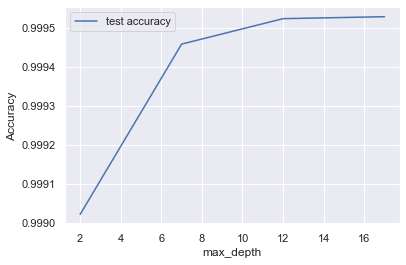

In [206]:
plt.figure()
#plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Model Building - on BALANCED Dataset - SMOTE , RANDOMSTATE and ADASYN (df1) "1" added in every dataframe name


# SMOTE & Print the class distribution after applying SMOTE

In [207]:
df1= pd.read_csv("data/creditcard.csv")
df1.shape

(284807, 31)

In [208]:
df1 = df1.drop('Time', axis = 1)

In [209]:
col = df1.columns
col = col.drop('Class')

In [211]:
X1 = df1[col]
y1 = df1.loc[ : , ['Class']]

In [212]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)

col_powertrans = ['V1', 'V2', 'V3', 'V8', 'V17', 'V21', 'V23', 'Amount']
X1[col_powertrans] = pt.fit_transform(X1[col_powertrans])


In [213]:
X1.skew(axis = 0, skipna = True)

V1        -0.218003
V2         0.334852
V3        -0.079980
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8         2.297590
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -0.791141
V18       -0.259880
V19        0.109192
V20       -2.037155
V21       -1.966863
V22       -0.213258
V23       -0.249209
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount     0.018354
dtype: float64

In [214]:
df1 = df1.drop('V28', axis = 1)

In [215]:
col = df1.columns
col = col.drop('Class')

In [216]:
X1 = df1[col]
y1 = df1.loc[ : , ['Class']]

In [225]:
X1.skew(axis = 0, skipna = True)

V1       -0.218003
V2        0.334852
V3       -0.079980
V4        0.676292
V5       -2.425901
V6        1.826581
V7        2.553907
V8        2.297590
V9        0.554680
V10       1.187141
V11       0.356506
V12      -2.278401
V13       0.065233
V14      -1.995176
V15      -0.308423
V16      -1.100966
V17      -0.791141
V18      -0.259880
V19       0.109192
V20      -2.037155
V21      -1.966863
V22      -0.213258
V23      -0.249209
V24      -0.552499
V25      -0.415793
V26       0.576693
V27      -1.170209
Amount    0.018354
dtype: float64

In [218]:
col_powertrans = ['V1', 'V2', 'V3', 'V8', 'V17', 'V21', 'V23', 'Amount']
X1[col_powertrans] = pt.fit_transform(X1[col_powertrans])
#to remove skewness in the data

In [219]:
X1.skew(axis = 0, skipna = True)

V1       -0.218003
V2        0.334852
V3       -0.079980
V4        0.676292
V5       -2.425901
V6        1.826581
V7        2.553907
V8        2.297590
V9        0.554680
V10       1.187141
V11       0.356506
V12      -2.278401
V13       0.065233
V14      -1.995176
V15      -0.308423
V16      -1.100966
V17      -0.791141
V18      -0.259880
V19       0.109192
V20      -2.037155
V21      -1.966863
V22      -0.213258
V23      -0.249209
V24      -0.552499
V25      -0.415793
V26       0.576693
V27      -1.170209
Amount    0.018354
dtype: float64

In [221]:
print(len(df1[df1.Class == 1].index)/len(df1.index)*100, "%" , ": Valid set")
print(len(df1[df1.Class == 0].index)/len(df1.index)*100, "%", " : Fraud set")

0.1727485630620034 % : Valid set
99.82725143693798 %  : Fraud set


In [226]:
X_train1,X_test1,y_train1,y_test1 =train_test_split(X1,y1, train_size = 0.7, test_size = 0.3, stratify=y, random_state=42)

In [227]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(199364, 28)
(199364, 1)
(85443, 28)
(85443, 1)


In [228]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X_train1, y_train1)

Using TensorFlow backend.


In [233]:
print(len(y_smote[y_smote.Class == 1].index)/len(y_smote.index)*100, "%" , ": Valid set")
print(len(y_smote[y_smote.Class == 0].index)/len(y_smote.index)*100, "%", " : Fraud set")

50.0 % : Valid set
50.0 %  : Fraud set


In [246]:
print(X_smote.shape)
print(y_smote.shape)
print(X_test1.shape)
print(y_test1.shape)

(398040, 28)
(398040, 1)
(85443, 28)
(85443, 1)


In [235]:
X_smote.skew(axis = 0, skipna = True)

V1       -0.979232
V2        2.703733
V3       -1.235545
V4        0.834193
V5       -2.419662
V6        0.633030
V7       -2.656432
V8        3.932607
V9       -1.288176
V10      -1.692280
V11       1.085729
V12      -1.360264
V13       0.049327
V14      -1.002159
V15      -0.442148
V16      -1.400598
V17      -1.168364
V18      -1.383678
V19       0.481630
V20       1.830090
V21      -1.082061
V22      -1.384090
V23      -0.604336
V24      -0.407723
V25      -0.212370
V26       0.519257
V27      -2.796573
Amount    0.144703
dtype: float64

In [ ]:
#first model - Linear regression

In [236]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_smote,y_smote)
preds = lr.svm.predict(X_test1)
metrics.accuracy_score(y_test1, preds)

0.972777173086151

In [ ]:
#before second model - RFE

In [237]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 13 variables as output
rfe = RFE(lr, 13)   
rfe = rfe.fit(X_smote, y_smote)

In [238]:
X_rfe = pd.DataFrame(data=X_smote).iloc[:, rfe.support_]
y_rfe = y_smote

In [239]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
X_test1_rfe = pd.DataFrame(data=X_test1).iloc[:, rfe.support_]

y_pred = lr.predict(X_test1_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred)
print(confusion_matrix)

[[83248  2047]
 [   20   128]]


In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.86      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
# decision tree

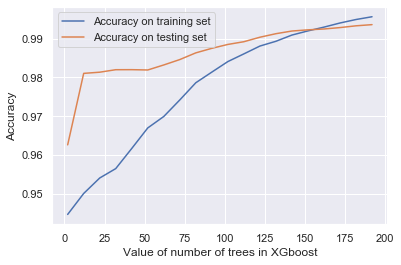

In [270]:
tree_range = range(2, 200, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_smote,y_smote)
    score1.append(xgb.score(X_smote,y_smote))
    score2.append(xgb.score(X_test1,y_test1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Random forest

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_smote, y_smote)

# Make predictions
prediction_test = model_rf.predict(X_test1)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test1, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9994499256814484


In [ ]:
print(confusion_matrix(y_test1, prediction_test))

In [251]:
#hyper parameter tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_smote, y_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [252]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.584283      0.264101         0.203874        0.002801   
1      76.158646      1.053853         0.323098        0.006737   
2     113.317943      0.784850         0.426046        0.007778   
3     129.060425      2.741031         0.490929        0.020102   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.929894           0.925284   
1               7   {'max_depth': 7}           0.974249           0.973935   
2              12  {'max_depth': 12}           0.996847           0.997400   
3              17  {'max_depth': 17}           0.999724           0.999686   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.936074           0.929743           0.935333         0.931266   
1           0.973282           0.973596           0.973357         0.973684   
2           0.997538           0.997010           0.997940         0.997347   
3           0.999761           0.999736           0.999799         0.999741   

   std_test_score  rank_test_score  
0        0.003991                4  
1        0.000363                3  
2        0.000388                2  
3        0.000038                1

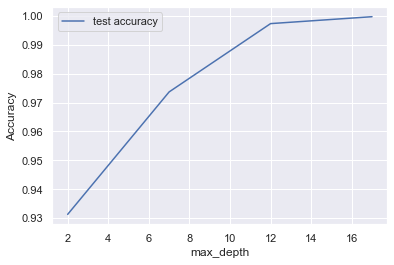

In [253]:
plt.figure()
#plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [260]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 7

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 500, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score = 'True')
tree.fit(X_smote, y_smote)

GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 500, 20)},
             p

In [261]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.998918      0.799656         0.008964        0.001352   
1      15.196668      1.185023         0.008170        0.000162   
2      14.230538      1.025474         0.008258        0.000347   
3      13.711544      0.891687         0.008018        0.000091   
4      13.463479      1.102989         0.008234        0.000610   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.997608   
1                     25  {'min_samples_leaf': 25}           0.994355   
2                     45  {'min_samples_leaf': 45}           0.992262   
3                     65  {'min_samples_leaf': 65}           0.990662   
4                     85  {'min_samples_leaf': 85}           0.989220   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.997661           0.997204           0.997978           0.997696   
1           0.994267           0.994161           0.994812           0.994249   
2           0.992227           0.991506           0.992948           0.992262   
3           0.990292           0.989853           0.991541           0.990117   
4           0.989624           0.988481           0.989413           0.988323   

   split5_test_score  split6_test_score  mean_test_score  std_test_score  \
0           0.997907           0.997626         0.997669        0.000231   
1           0.994161           0.994706         0.994387        0.000245   
2           0.991752           0.992139         0.992157        0.000421   
3           0.990099           0.990978         0.990506        0.000549   
4           0.988921           0.989536         0.989074        0.000477   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999129            0.999086   
1                2            0.995829            0.995773   
2                3            0.993666            0.993417   
3                4            0.992063            0.991213   
4                5            0.989993            0.989985   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.999109            0.999121            0.999106   
1            0.995688            0.995697            0.996075   
2            0.993259            0.993347            0.993766   
3            0.991535            0.991644            0.991682   
4            0.989627            0.989800            0.989862   

   split5_train_score  split6_train_score  mean_train_score  std_train_score  
0            0.999147            0.999127          0.999118         0.000018  
1            0.995738            0.996210          0.995859         0.000188  
2            0.993408            0.993892          0.993536         0.000220  
3            0.991679            0.992151          0.991709         0.000293  
4            0.989897            0.990679          0.989978         0.000309

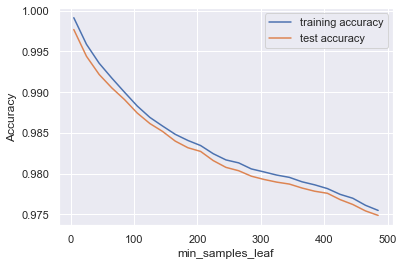

In [262]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [263]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_smote, y_smote)

# Make predictions
prediction_test = model_rf.predict(X_test1)

In [265]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,prediction_test))
print(confusion_matrix(y_test1,prediction_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.86      0.29       148

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.64     85443
weighted avg       1.00      0.99      1.00     85443

[[84677   618]
 [   20   128]]


In [266]:
print ('Random Forest Accuracy : ',metrics.accuracy_score(y_test1, prediction_test))

Random Forest Accuracy :  0.9925330337183853


########
Accuraacy on training :  0.9831574716108934
Accuraacy on test :  0.9882611799679318
########
confusion matrix
[[196809   4493]
 [  2211 194527]]
confusion matrix
[[84310    18]
 [  985   130]]
########
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     84328
           1       0.88      0.12      0.21      1115

    accuracy                           0.99     85443
   macro avg       0.93      0.56      0.60     85443
weighted avg       0.99      0.99      0.98     85443

########
area under AUC curve is : 0.9716253447890707


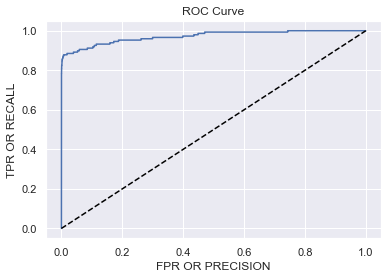

In [255]:
#XGBOOST 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

model_xg = XGBClassifier()
model_xg.fit(X_smote,y_smote)

print ('########')

print("Accuraacy on training : ", model_xg.score(X_smote,y_smote))
print("Accuraacy on test : ", model_xg.score(X_test1, y_test1))

print ('########')

y_train_pred = model_xg.predict(X_smote)
print('confusion matrix')
print(confusion_matrix(y_train_pred, y_smote))

y_test_pred = model_xg.predict(X_test1)
print('confusion matrix')
print(confusion_matrix(y_test_pred, y_test1))

print ('########')
print(classification_report(y_test_pred, y_test1))
print ('########')

#ROC and AUC
y_score = model_xg.predict_proba(X_test1)[:,1]
fpr,tpr, _ = roc_curve(y_test1, y_score)

plt.title('ROC Curve')
plt.xlabel('FPR OR PRECISION')
plt.ylabel('TPR OR RECALL')

plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed' , color = 'black')
plt.show
print('area under AUC curve is :', auc(fpr,tpr))

IndexError: too many indices for array

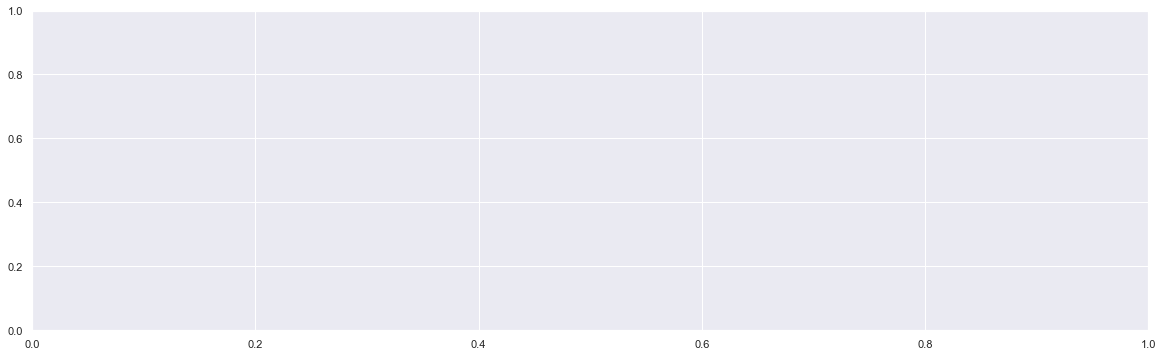

In [274]:
import warnings
warnings.filterwarnings("ignore")


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_smote, y_smote)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_smote.shape[0]:]

X_train_1 = X_smote.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_smote.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# ADASYN & Print the class distribution after applying ADASYN

In [275]:
from imblearn.over_sampling import SMOTE, ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train1, y_train1)

In [277]:
print(len(y_adasyn[y_adasyn.Class == 1].index)/len(y_adasyn.index)*100, "%" , ": Valid set")
print(len(y_adasyn[y_adasyn.Class == 0].index)/len(y_adasyn.index)*100, "%", " : Fraud set")

50.00263778667089 % : Valid set
49.99736221332911 %  : Fraud set


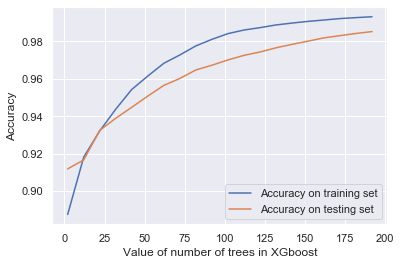

In [278]:
tree_range = range(2, 200, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_adasyn,y_adasyn)
    score1.append(xgb.score(X_adasyn,y_adasyn))
    score2.append(xgb.score(X_test1,y_test1))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()